In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
data_dict = pd.read_table("2025_Problem_C_Data\\data_dictionary.csv", encoding="Windows-1252",sep=",")



# 变量说明

In [25]:
data_dict.iloc[0:8,]

,summerOly_medal_counts.csv,Unnamed: 1,Unnamed: 2
0,variables,explanation,example
1,Rank,Rank of country based on total medals won,"1, 2"
2,NOC,Name of country as recorded for that Olympics,"China, France"
3,Gold,Number of Gold medals the country earned,"0, 1, 2"
4,Silver,Number of Silver medals the country earned,"0, 1, 2"
5,Bronze,Number of Bronze medals the country earned,"0, 1, 2"
6,Total,Number of Total medals the country earned,"0, 1, 2"
7,Year,Olympic year,"1896, 1900"


In [26]:
data_dict.iloc[11:14,]

,summerOly_medal_counts.csv,Unnamed: 1,Unnamed: 2
11,variables,explanation,example
12,Year,Olympic year,"1896, 1900"
13,Host,"Location where olympics were held (city, country)","St. Louis, United States"


In [27]:
data_dict.iloc[17:36,]

,summerOly_medal_counts.csv,Unnamed: 1,Unnamed: 2
17,variables,explanation,example
18,Sport,Sport category,"Aquatics, Cycling"
19,Discipline,Discipline within the sport category,"Artistic swimming, Diving"
20,Code,Code for the discipline,"SWA, DIV"
21,Year,Number of events in disipline for that year,"0, 1"
22,Data set of current and discontinued summer pr...,NaN,NaN
23,Column Descriptors,NaN,NaN
24,Sport and Discipline:,The sports (and disciplines) make up the curre...,NaN
25,Code:,Each discipline is marked with a unique 3-char...,NaN
26,Sports Governing Body:,A listing of the sports governing bodies assoc...,NaN


In [28]:
data_dict.iloc[39:50,]

,summerOly_medal_counts.csv,Unnamed: 1,Unnamed: 2
39,variables,explanation,example
40,Name,Athlete name,"Cai Yun, Carl Lewis"
41,Sex,Sex of athlete,"F, M"
42,Team,Country name as recorded at the Olympics,"China, France"
43,NOC,Name of Country (code),"CHN, FRA"
44,Year,Olympic year,"1896, 1900"
45,Season,Type of Olympics,Summer
46,City,City where Olympics were held,"Beijing, Paris"
47,Sport,Sport category,"Aquatics, Cycling"
48,Event,Event within the sport,Gymnastics Men's Rings


以下是对该文件内容的翻译：

---

### **文件 1：夏季奥运会奖牌统计 (summerOly_medal_counts.csv)**

| 变量名称 | 解释                               | 示例               |
|----------|------------------------------------|--------------------|
| Rank     | 国家奖牌总数排名                   | "1, 2"             |
| NOC      | 该奥运会记录的国家名称             | "中国, 法国"       |
| Gold     | 国家获得的金牌数量                 | "0, 1, 2"          |
| Silver   | 国家获得的银牌数量                 | "0, 1, 2"          |
| Bronze   | 国家获得的铜牌数量                 | "0, 1, 2"          |
| Total    | 国家获得的奖牌总数                 | "0, 1, 2"          |
| Year     | 奥运会年份                         | "1896, 1900"       |

---

### **文件 2：夏季奥运会举办地 (summerOly_hosts.csv)**

| 变量名称 | 解释                                       | 示例                      |
|----------|--------------------------------------------|---------------------------|
| Year     | 奥运会年份                                 | "1896, 1900"              |
| Host     | 奥运会举办地（城市，国家）                 | "圣路易斯, 美国"          |

---

### **文件 3：夏季奥运会项目 (summerOly_programs.csv)**

| 变量名称   | 解释                                                         | 示例                            |
|------------|--------------------------------------------------------------|---------------------------------|
| Sport      | 体育类别                                                     | "水上运动, 自行车"             |
| Discipline | 体育类别内的具体项目                                         | "艺术体操, 跳水"               |
| Code       | 项目的代码                                                   | "SWA, DIV"                     |
| Year       | 该项目在某年奥运会中的比赛数量                               | "0, 1"                         |

#### 数据说明：
- **体育和项目 (Sport and Discipline)**：包括当前和已取消的夏季奥运会官方项目，按国际奥委会（IOC）使用的名称按字母顺序排列。
- **代码 (Code)**：每个项目由 IOC 分配一个独特的 3 字符标识符代码。
- **体育管理机构**：列出与奥运会体育相关的国际管理机构。
- **年份 (1896-2028)**：列的四位数代表相关奥运会的年份。
- 表格中的数字表示该项目在该年举办的比赛数量；某些项目可能标记为展示项目（非正式项目）。

---

### **文件 4：夏季奥运会运动员数据 (summerOly_athletes.csv)**

| 变量名称 | 解释                                   | 示例                       |
|----------|----------------------------------------|----------------------------|
| Name     | 运动员姓名                             | "蔡赟, 卡尔·刘易斯"        |
| Sex      | 运动员性别                             | "女 (F), 男 (M)"           |
| Team     | 国家名称（奥运会记录的）               | "中国, 法国"               |
| NOC      | 国家代码                               | "CHN, FRA"                 |
| Year     | 奥运会年份                             | "1896, 1900"               |
| Season   | 奥运会类型                             | 夏季 (Summer)              |
| City     | 奥运会举办城市                         | "北京, 巴黎"               |
| Sport    | 体育类别                               | "水上运动, 自行车"         |
| Event    | 项目名称                               | "体操男子吊环"             |
| Medal    | 获得的奖牌类型                         | "无奖牌, 金牌 (Gold)"      |

---

### **备注**
1. **1906年奥运会**：原计划每四年举办一次，地位与正式奥运会相同，但仅在 1906 年于雅典举办了一次，之后取消。
2. **冬季项目迁移**：在 1924 年之前，一些冰上项目（如花样滑冰和冰球）在夏季奥运会中举办，1924 年起转移至冬奥会。
3. **管理机构变化**：如拳击的管理机构从 2023 年起由 AIBA 改为 IBA。

---

# 获取分析历史数据

In [63]:
history_medal_counts = pd.read_csv("2025_Problem_C_Data\\summerOly_medal_counts.csv", encoding="Windows-1252",sep=",")

In [64]:
history_medal_counts

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896
...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024
1431,84,Refugee Olympic Team,0,0,1,1,2024
1432,84,Singapore,0,0,1,1,2024
1433,84,Slovakia,0,0,1,1,2024


# 对于历史上已经消失或者合并的国家的数据进行清洗

In [56]:
# 获取国家的名称
noc_names = history_medal_counts["NOC"].unique()
print(noc_names)

['United States' 'Greece' 'Germany' 'France' 'Great Britain' 'Hungary'
 'Austria' 'Australia' 'Denmark' 'Switzerland' 'Mixed team' 'Belgium'
 'Italy' 'Cuba' 'Canada' 'Spain' 'Luxembourg' 'Norway' 'Netherlands'
 'India' 'Bohemia' 'Sweden' 'Australasia' 'Russian Empire' 'Finland'
 'South Africa' 'Estonia' 'Brazil' 'Japan' 'Czechoslovakia' 'New Zealand'
 'Yugoslavia' 'Argentina' 'Uruguay' 'Poland' 'Haiti' 'Portugal' 'Romania'
 'Egypt' 'Ireland' 'Chile' 'Philippines' 'Mexico' 'Latvia' 'Turkey'
 'Jamaica' 'Peru' 'Ceylon' 'Trinidad and Tobago' 'Panama' 'South Korea'
 'Iran' 'Puerto Rico' 'Soviet Union' 'Lebanon' 'Bulgaria' 'Venezuela'
 'United Team of Germany' 'Iceland' 'Pakistan' 'Bahamas' 'Ethiopia'
 'Formosa' 'Ghana' 'Morocco' 'Singapore' 'British West Indies' 'Iraq'
 'Tunisia' 'Kenya' 'Nigeria' 'East Germany' 'West Germany' 'Mongolia'
 'Uganda' 'Cameroon' 'Taiwan' 'North Korea' 'Colombia' 'Niger' 'Bermuda'
 'Thailand' 'Zimbabwe' 'Tanzania' 'Guyana' 'China' 'Ivory Coast' 'Syria'
 'Algeria

In [65]:
# Step 1: Redefine the removal and merge rules based on updated requirements
# Countries/regions to remove entirely
final_remove_nocs = [
    "Bohemia", "Australasia", "Russian Empire", "Czechoslovakia",
    "Unified Team", "Mixed team", "East Germany", "West Germany",
    "United Team of Germany", "FR Yugoslavia", "Serbia and Montenegro",
    "Soviet Union"
]

# Update merge mappings
final_merge_nocs = {
    "Formosa": "Chinese Taipei"  # Merge Formosa with Chinese Taipei
    # Note: China, Hong Kong, and Macau remain separate
}

# Step 2: Start cleaning process from original data
final_cleaned_data = history_medal_counts[~history_medal_counts["NOC"].isin(final_remove_nocs)]

# Replace NOC names based on updated merge mapping
final_cleaned_data["NOC"] = final_cleaned_data["NOC"].replace(final_merge_nocs)

# Step 3: Recalculate totals and ranks with the updated cleaning rules
final_cleaned_data = (
    final_cleaned_data.groupby(["Year", "NOC"], as_index=False)
    .agg({"Gold": "sum", "Silver": "sum", "Bronze": "sum"})
)
final_cleaned_data["Total"] = final_cleaned_data["Gold"] + final_cleaned_data["Silver"] + final_cleaned_data["Bronze"]

# Rank NOCs within each year
final_cleaned_data["Rank"] = (
    final_cleaned_data.sort_values(["Year", "Total", "Gold", "Silver"], ascending=[True, False, False, False])
    .groupby("Year")
    .cumcount() + 1
)

# Display the first few rows of the final cleaned dataset
final_cleaned_data.head()



C:\Users\Tieti_Tage\AppData\Local\Temp\ipykernel_13212\3887017342.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cleaned_data["NOC"] = final_cleaned_data["NOC"].replace(final_merge_nocs)


,Year,NOC,Gold,Silver,Bronze,Total,Rank
0,1896,Australia,2,0,0,2,10
1,1896,Austria,2,1,2,5,8
2,1896,Denmark,1,2,3,6,7
3,1896,France,5,4,2,11,4
4,1896,Germany,6,5,2,13,3


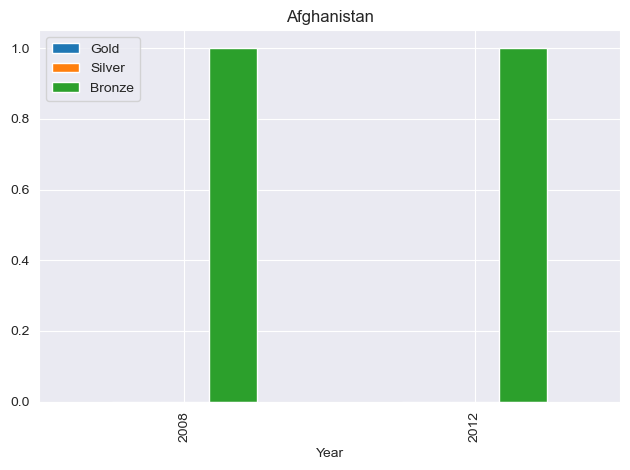

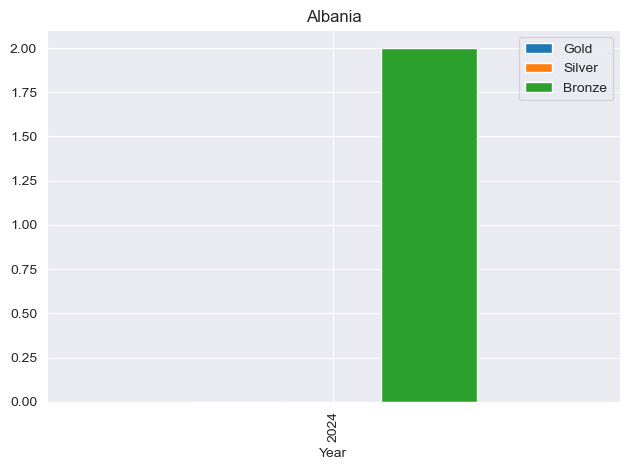

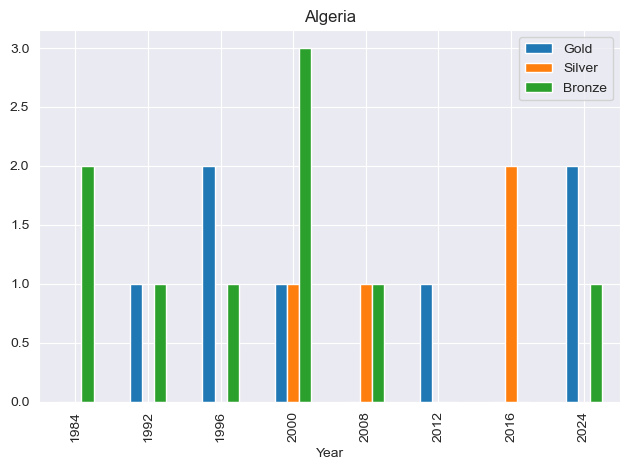

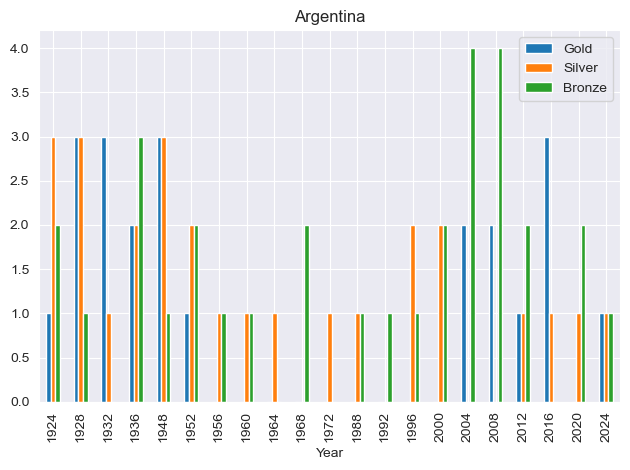

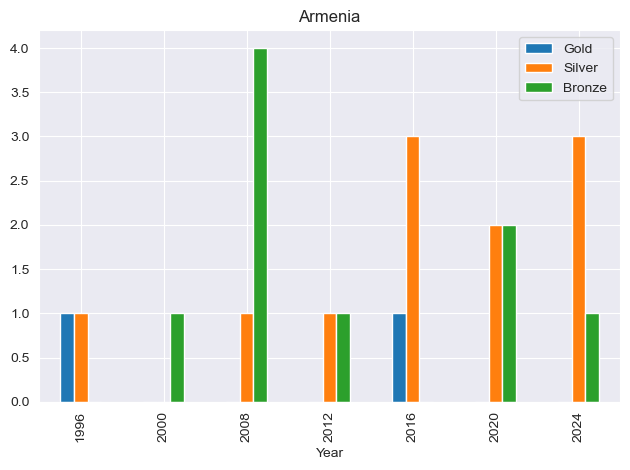

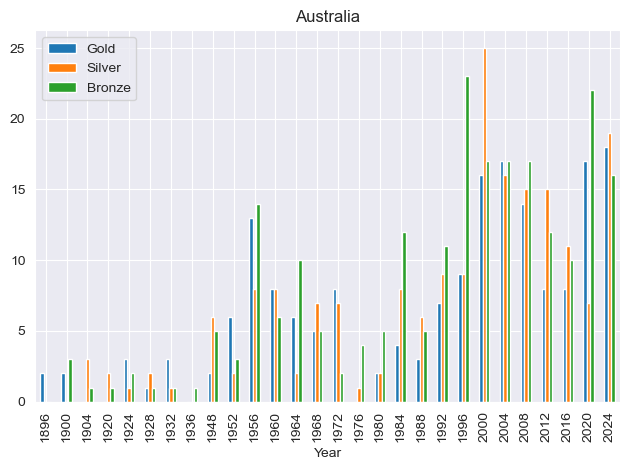

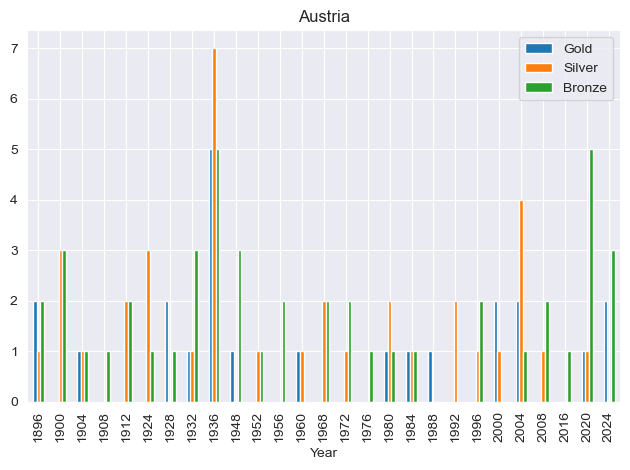

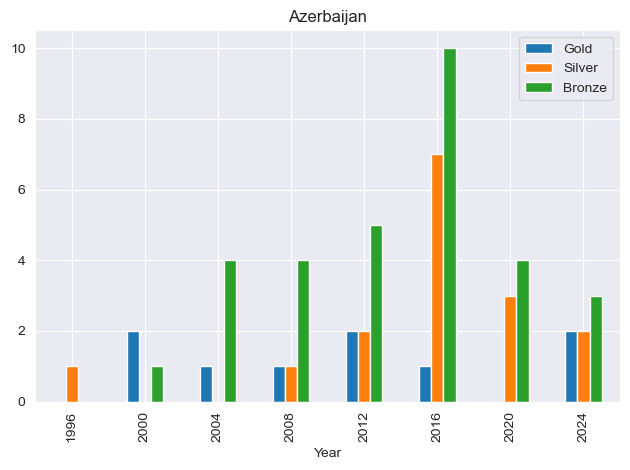

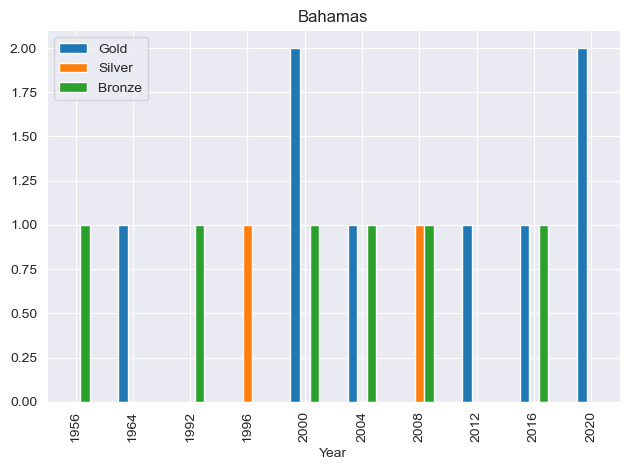

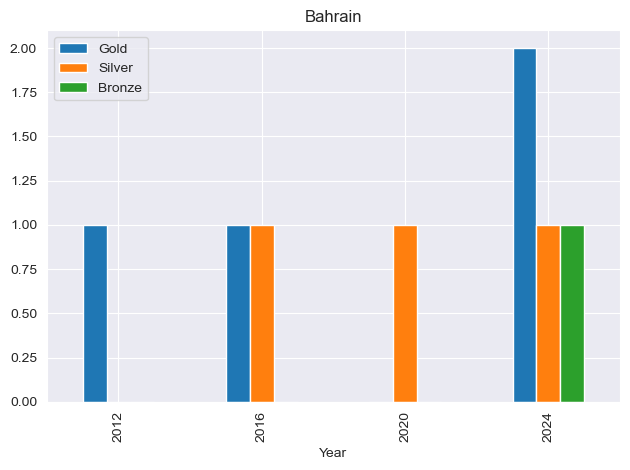

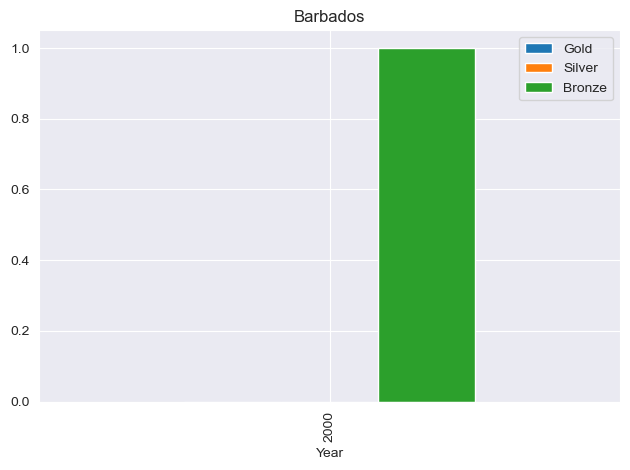

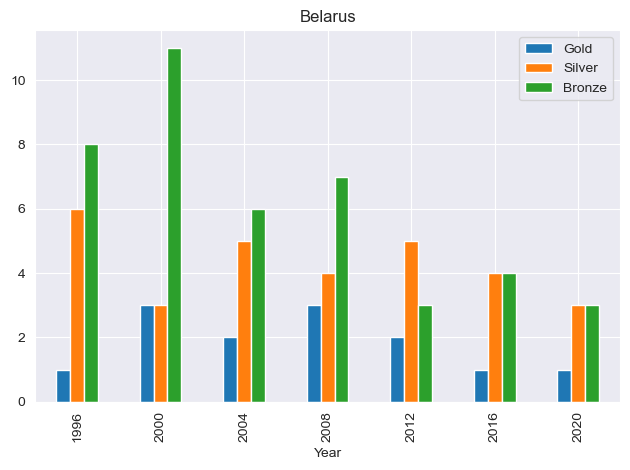

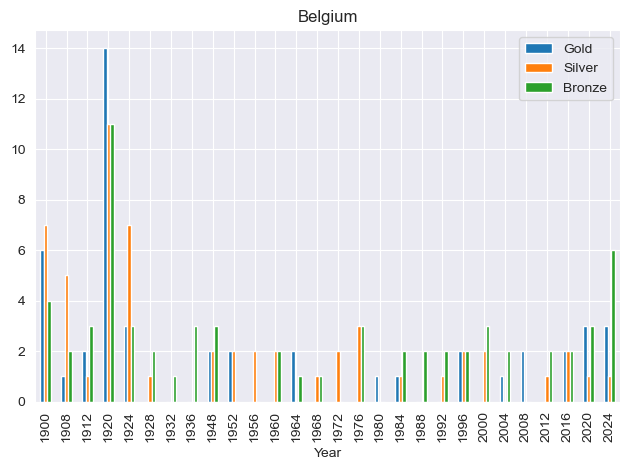

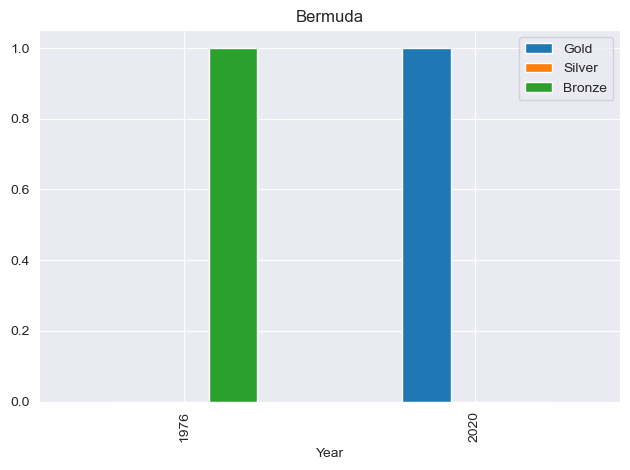

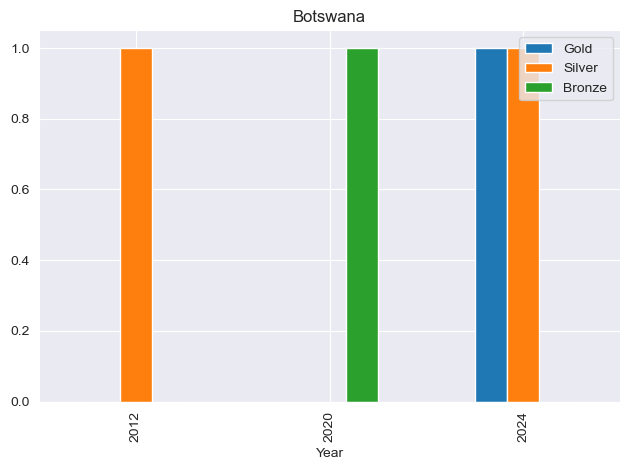

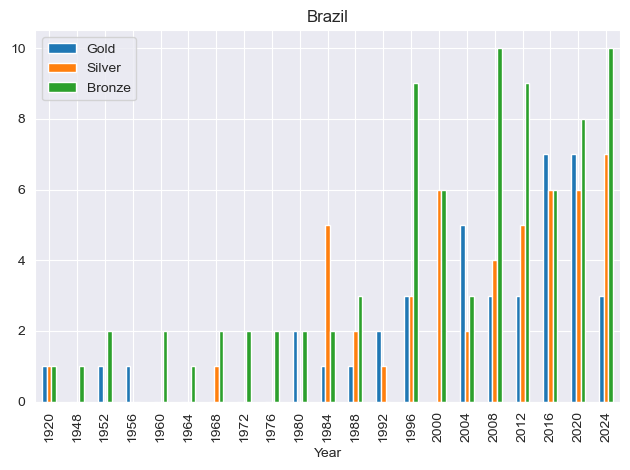

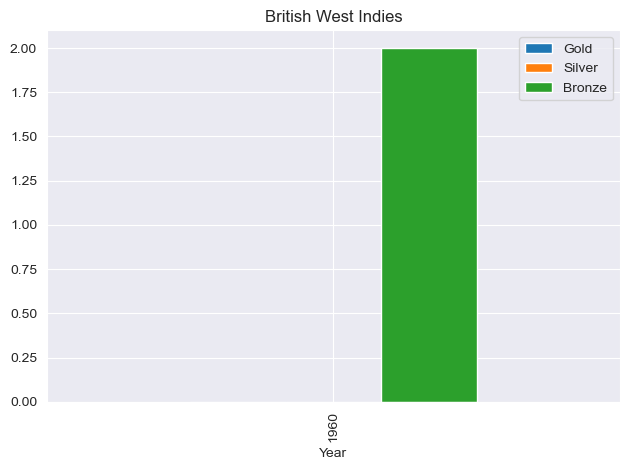

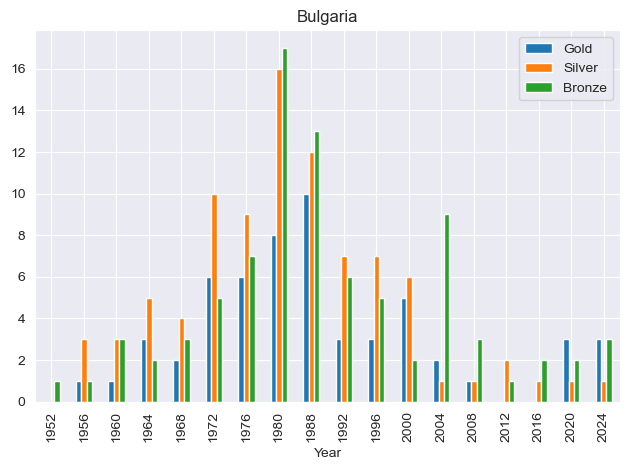

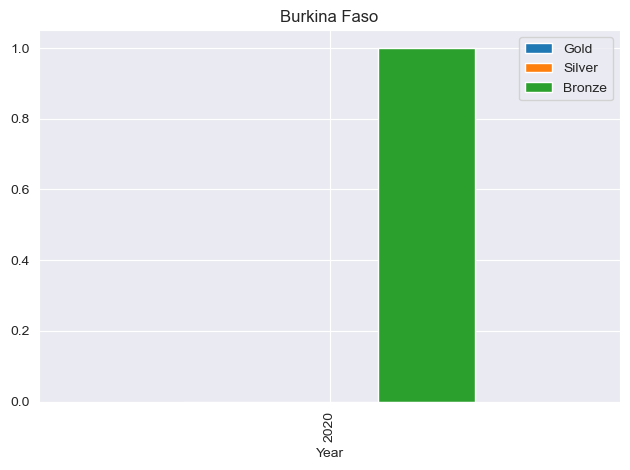

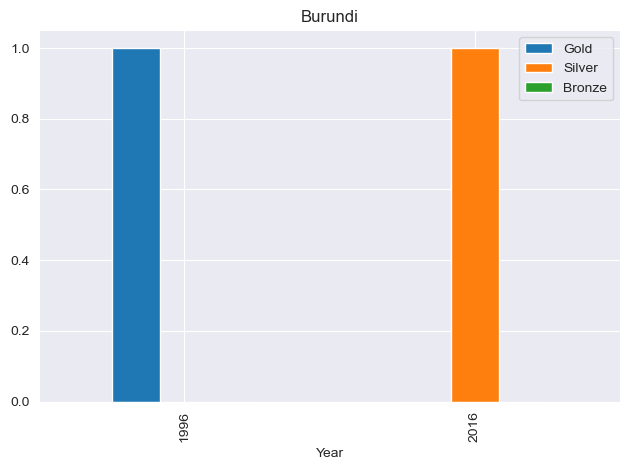

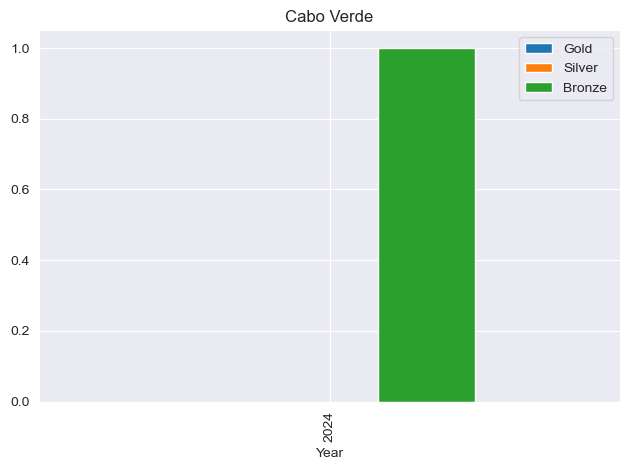

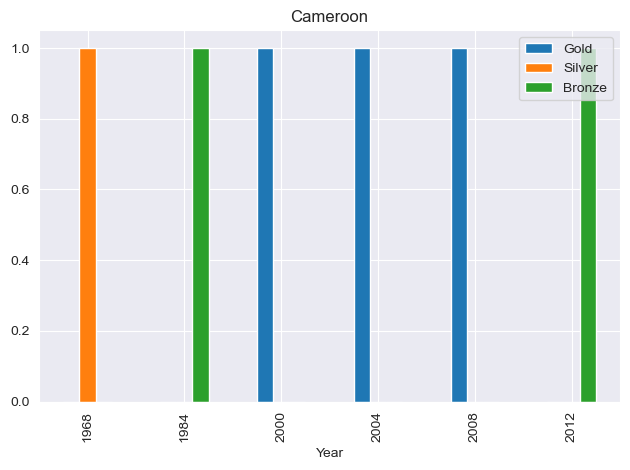

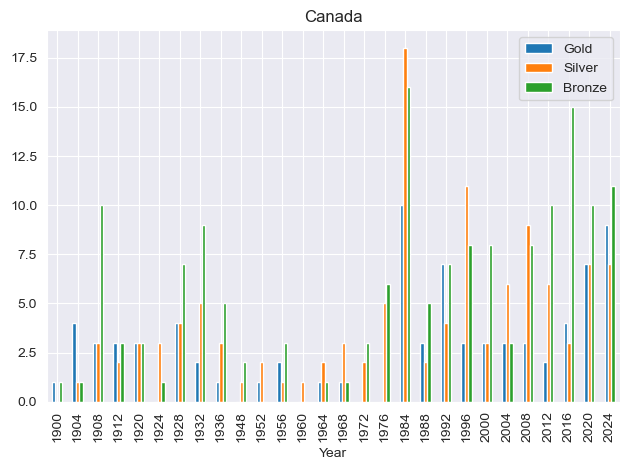

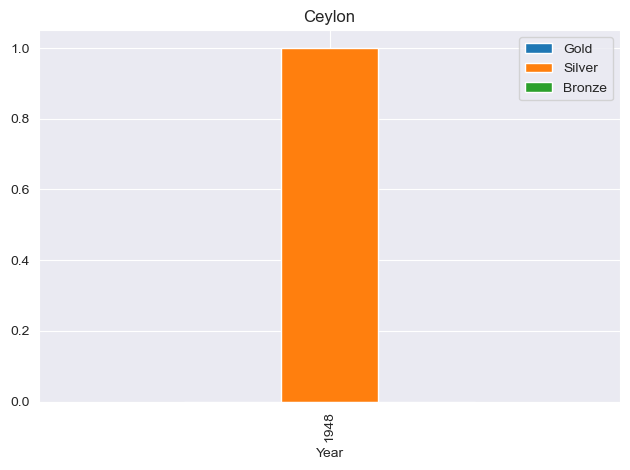

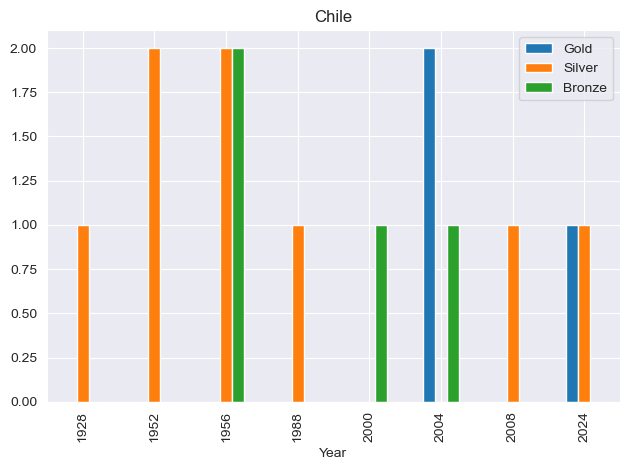

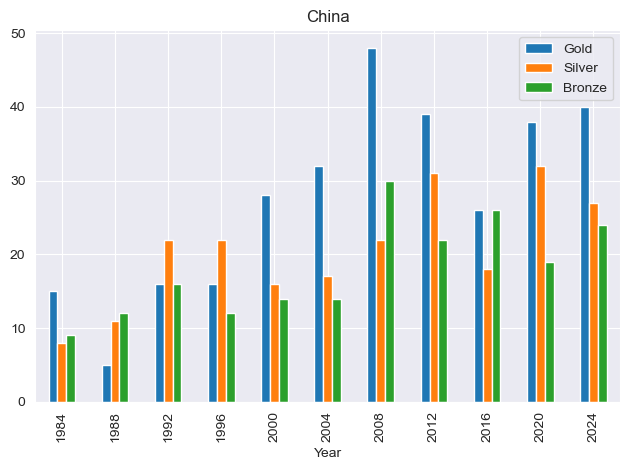

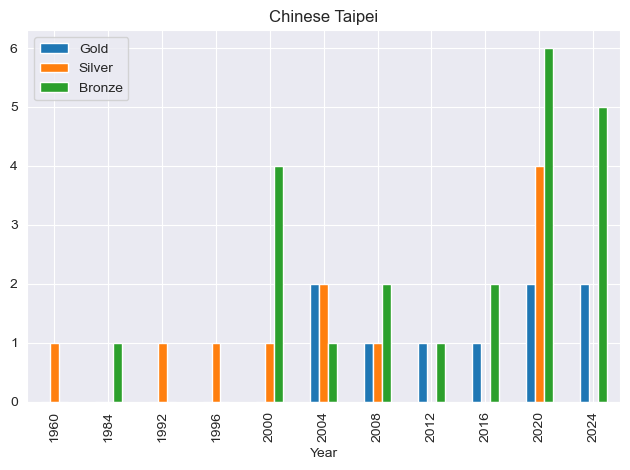

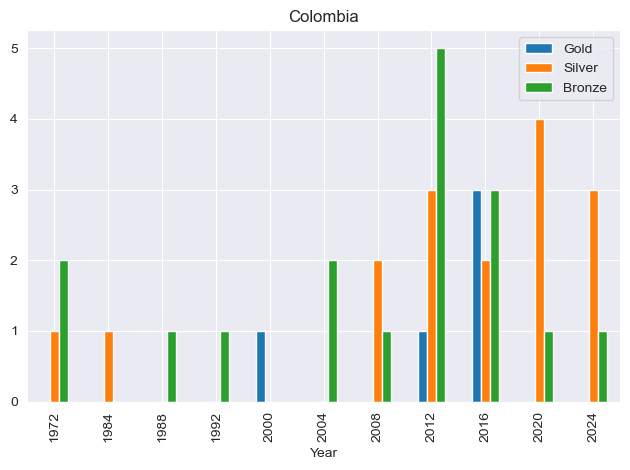

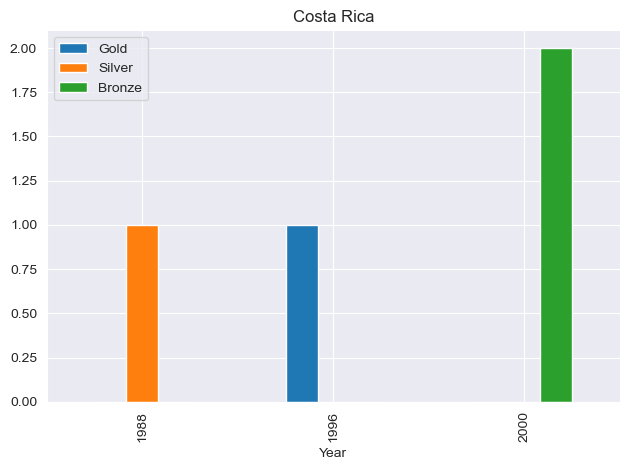

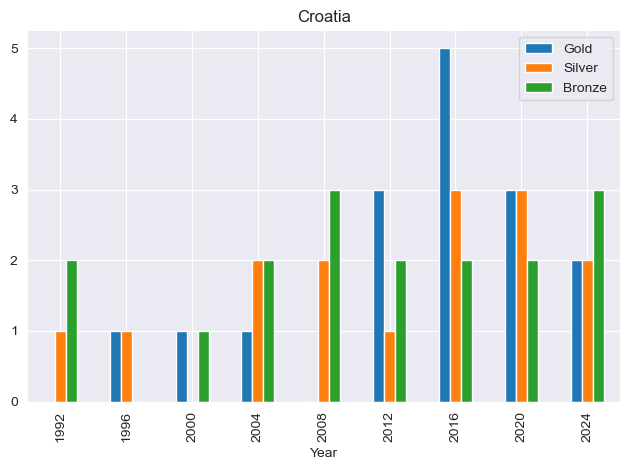

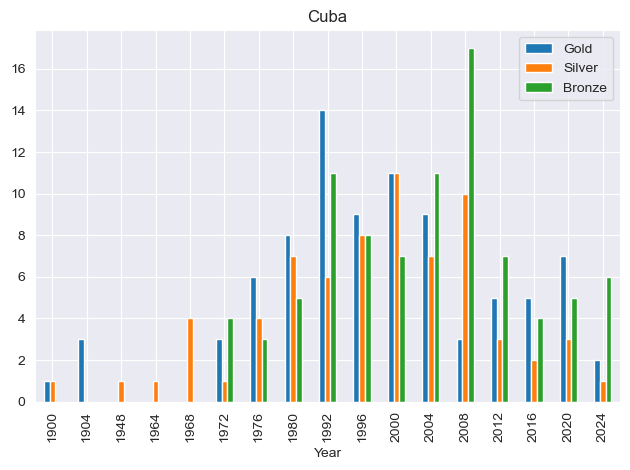

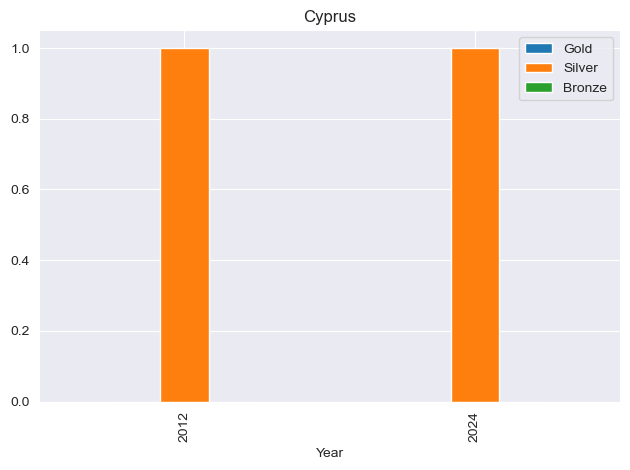

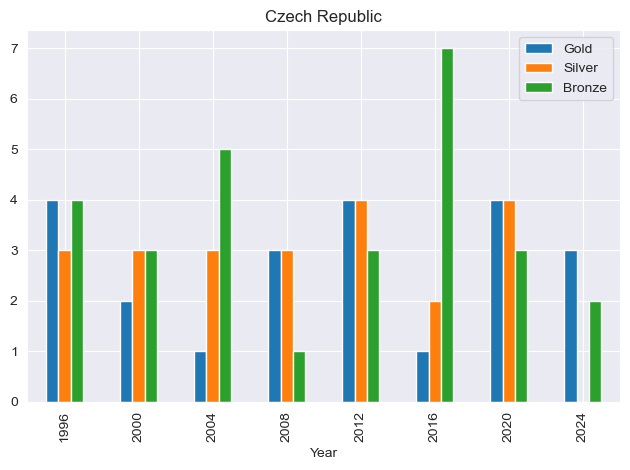

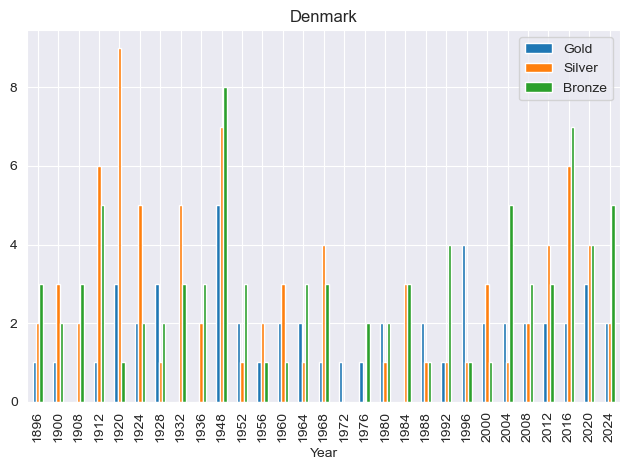

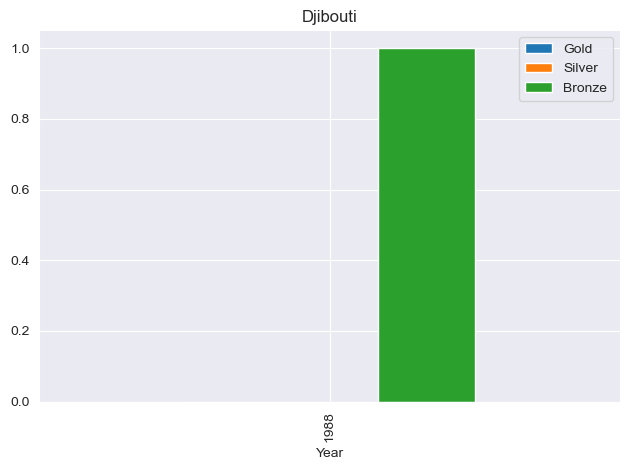

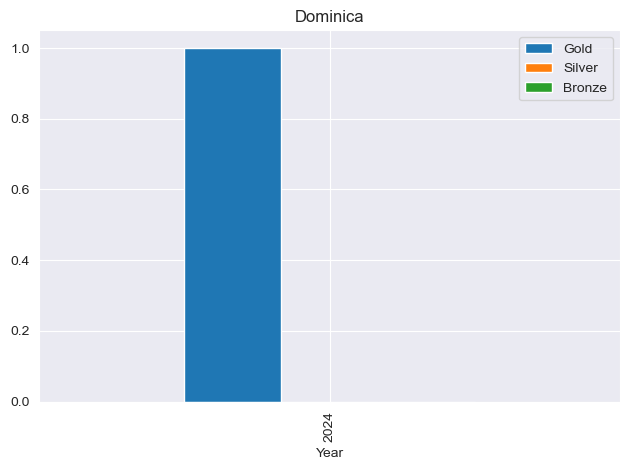

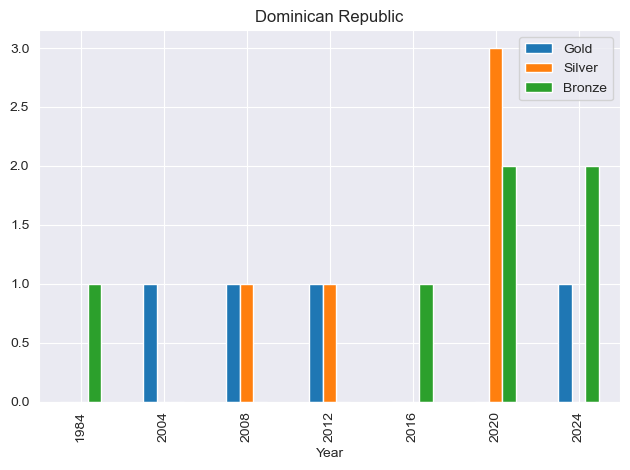

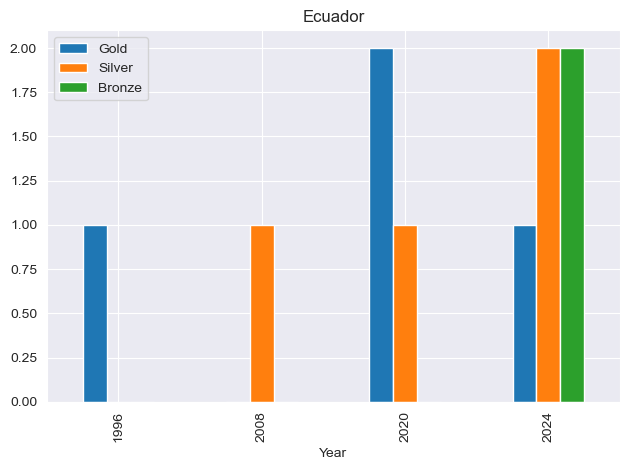

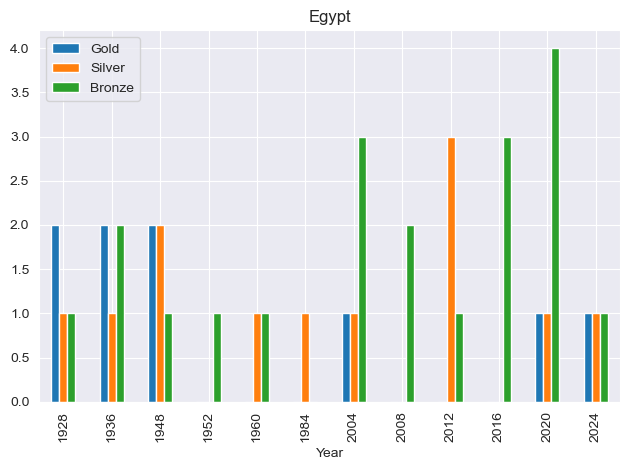

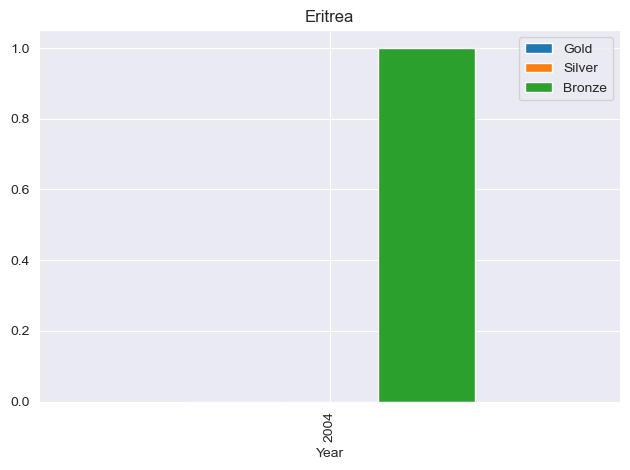

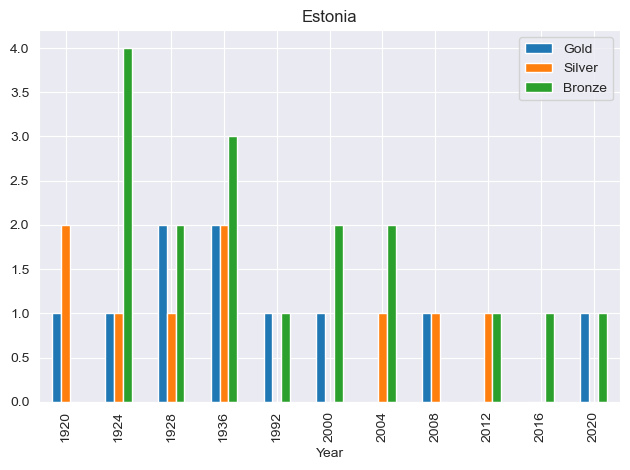

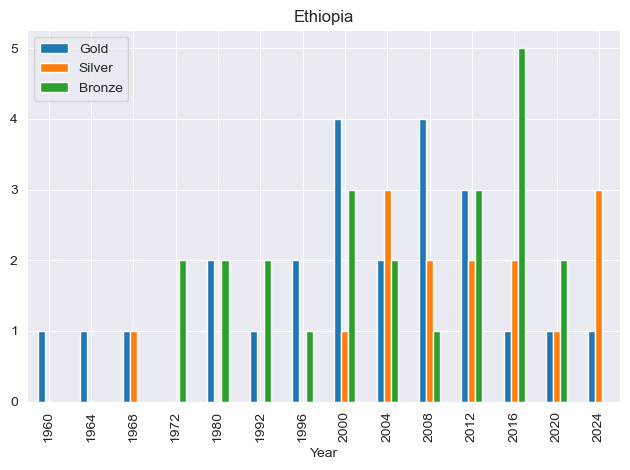

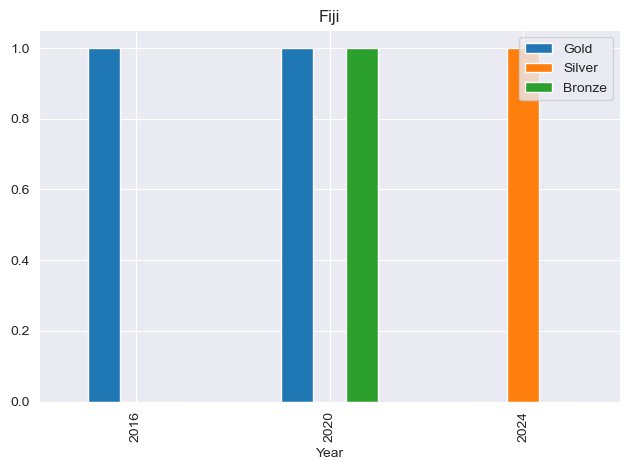

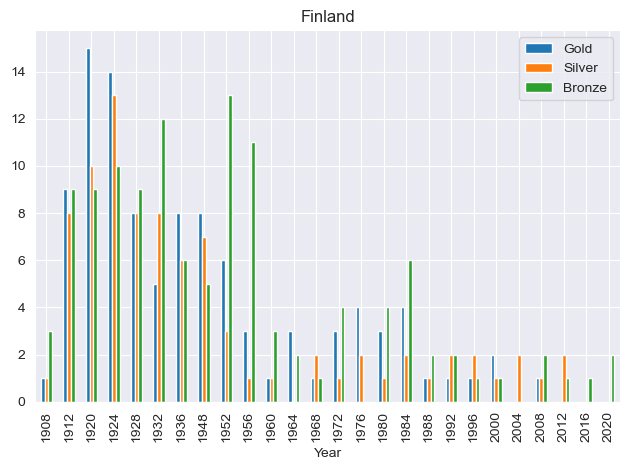

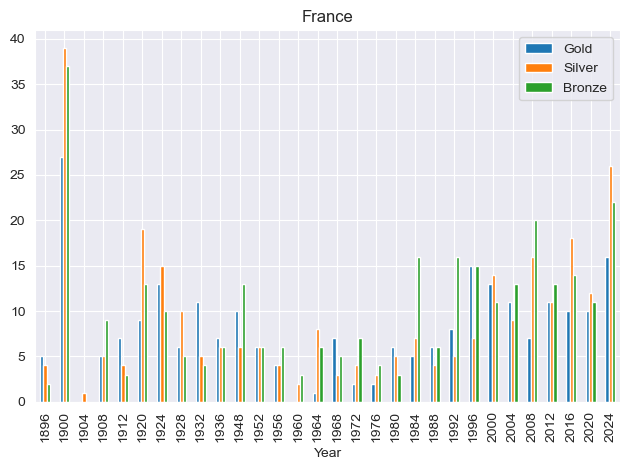

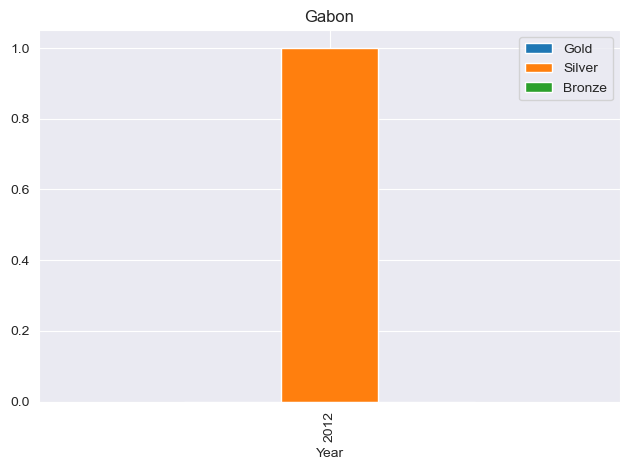

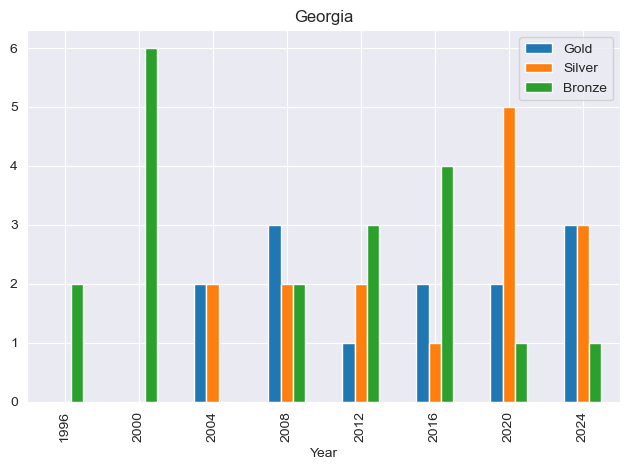

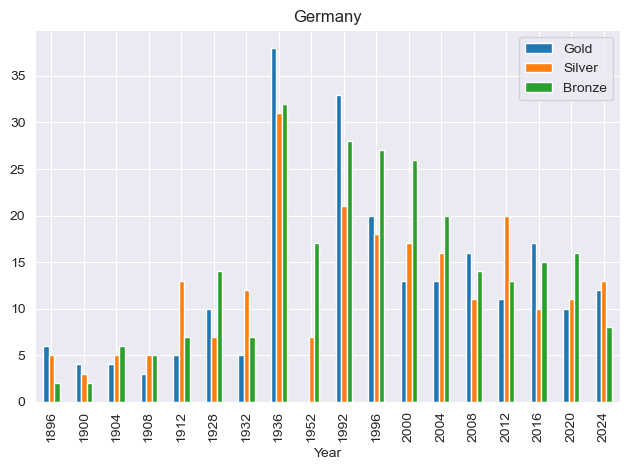

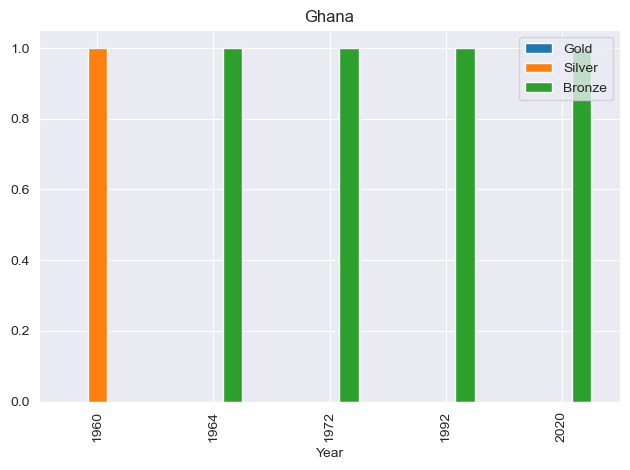

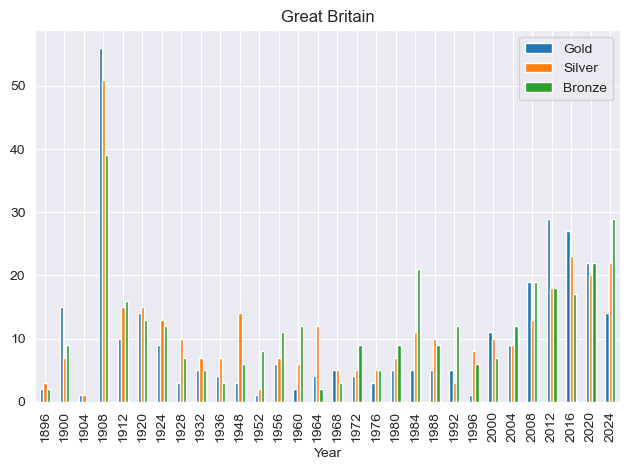

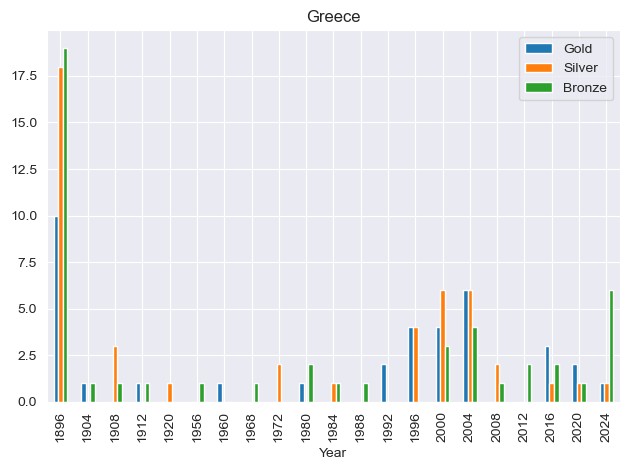

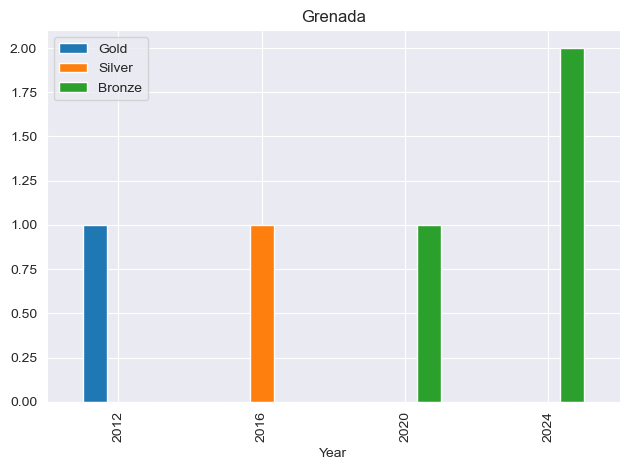

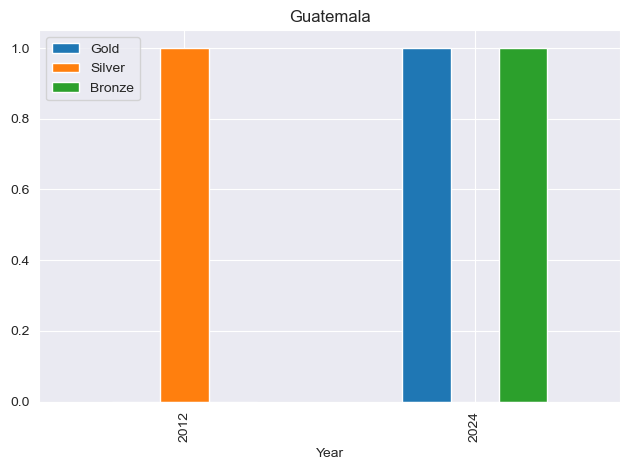

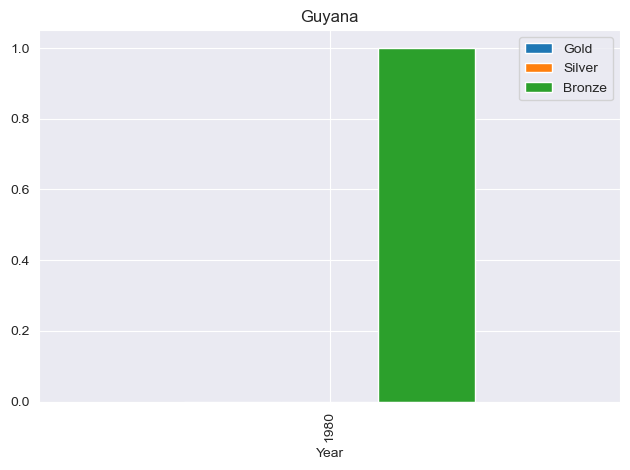

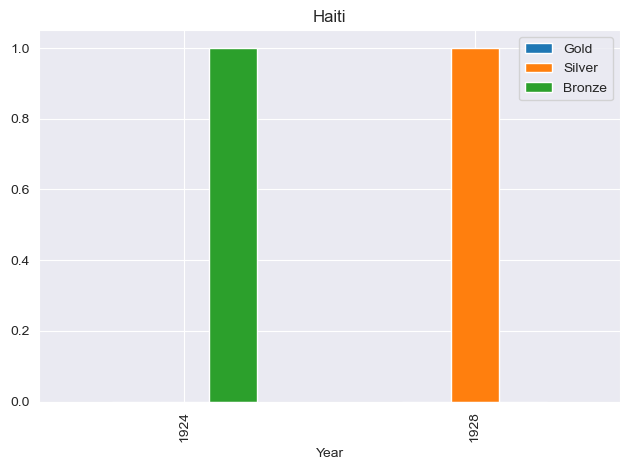

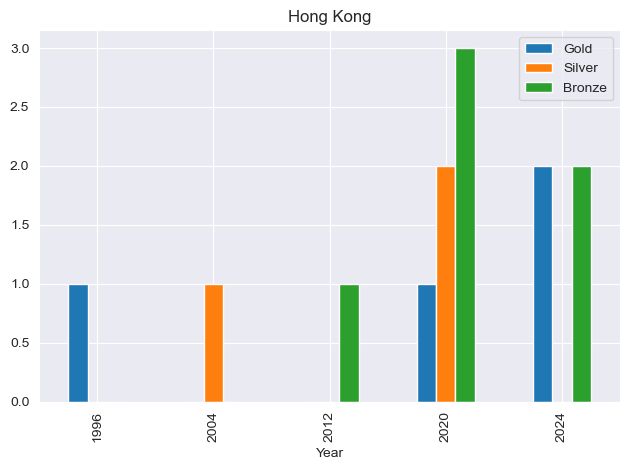

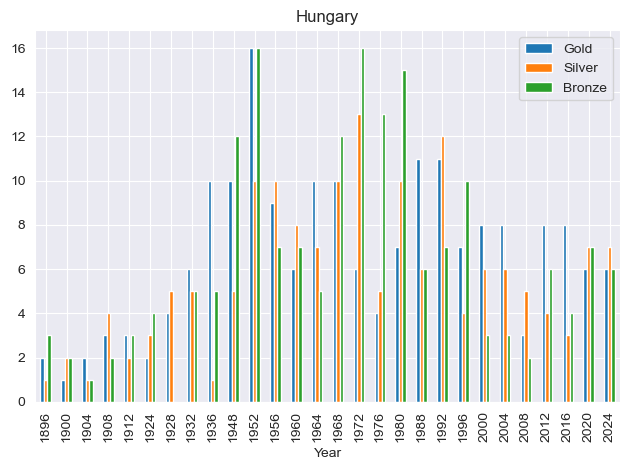

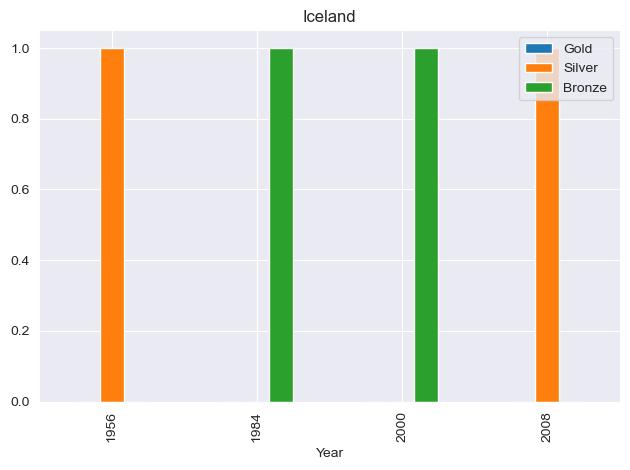

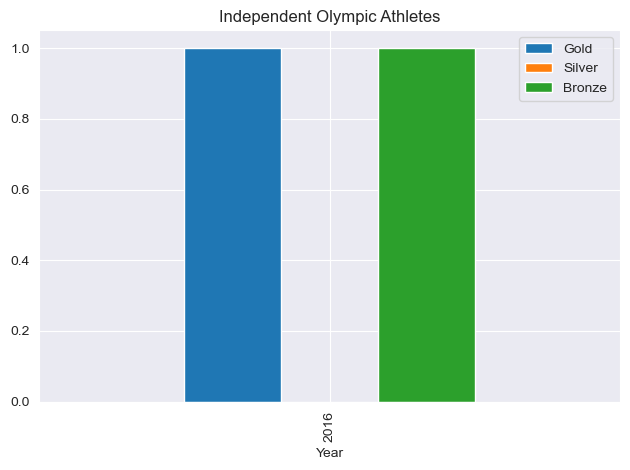

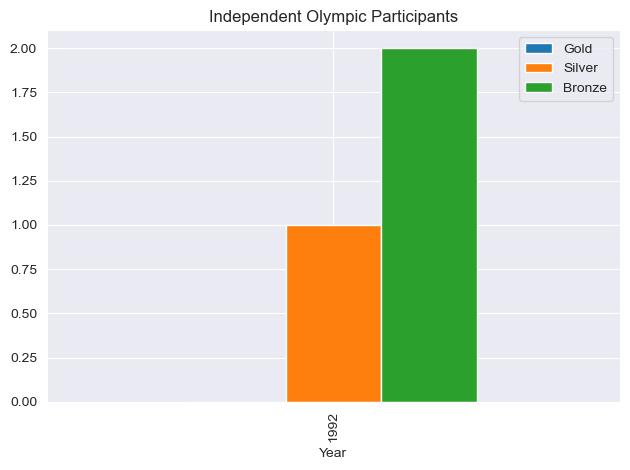

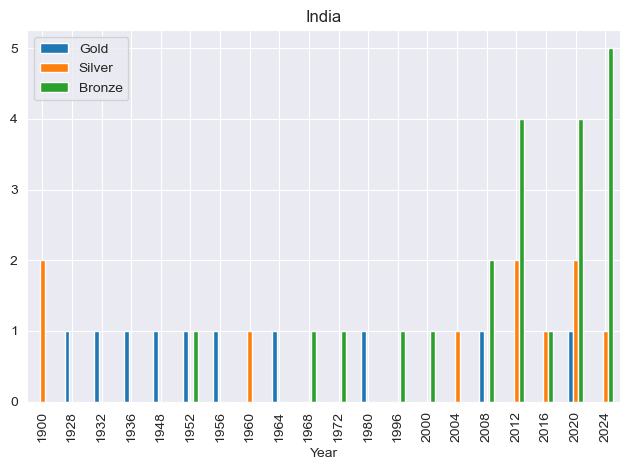

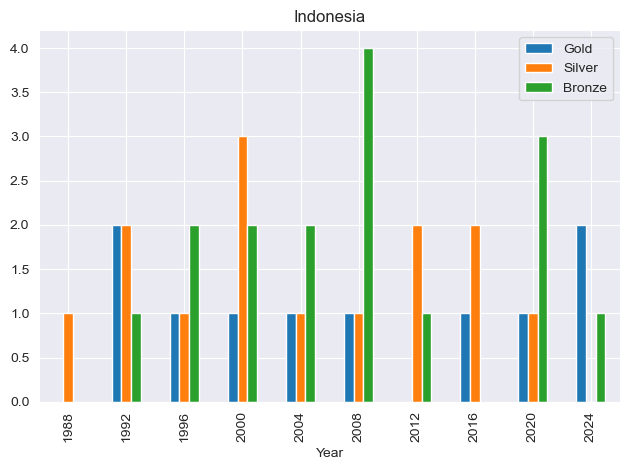

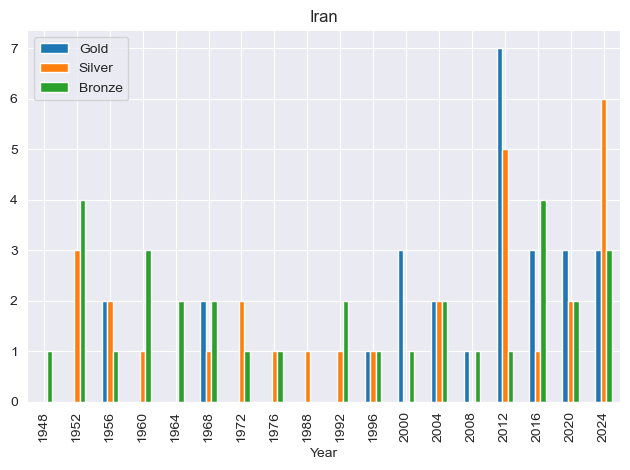

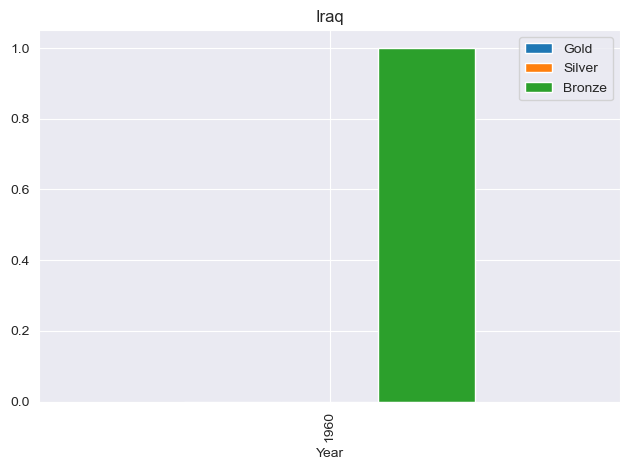

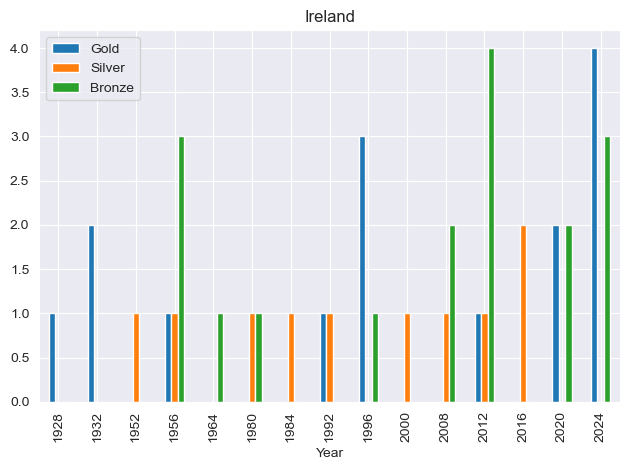

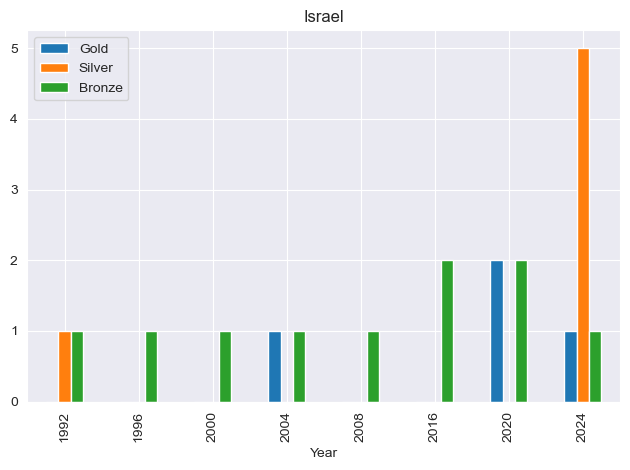

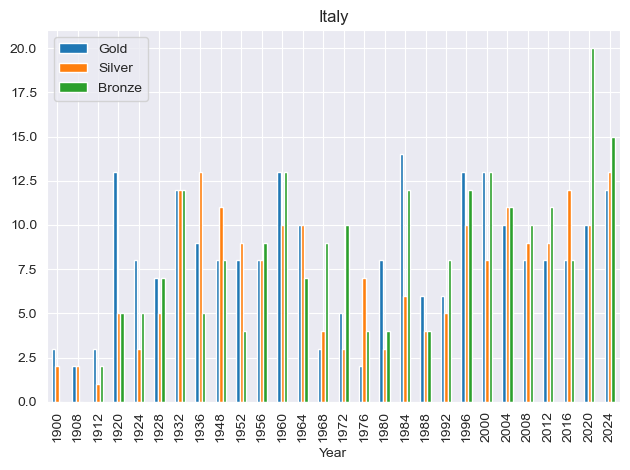

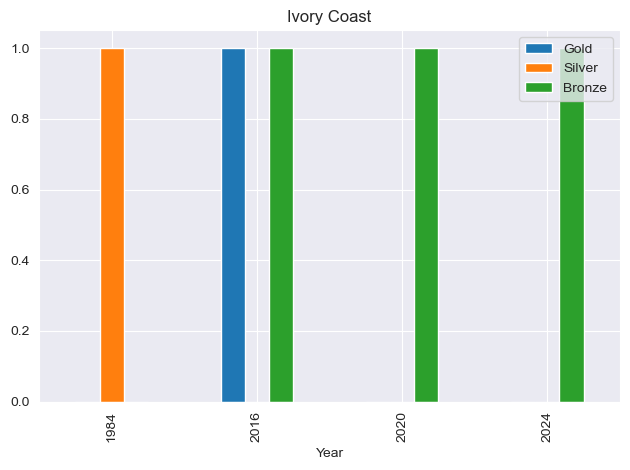

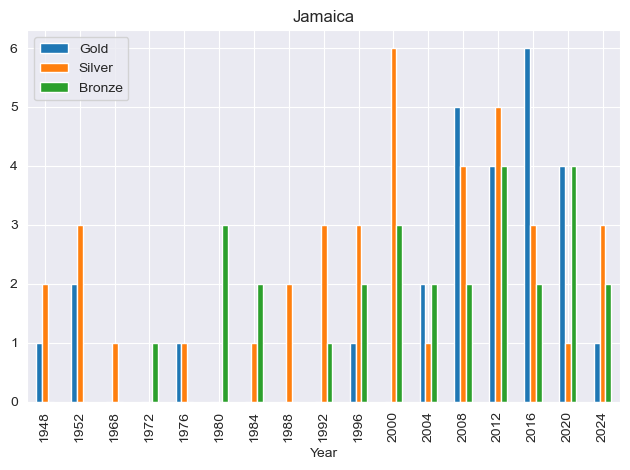

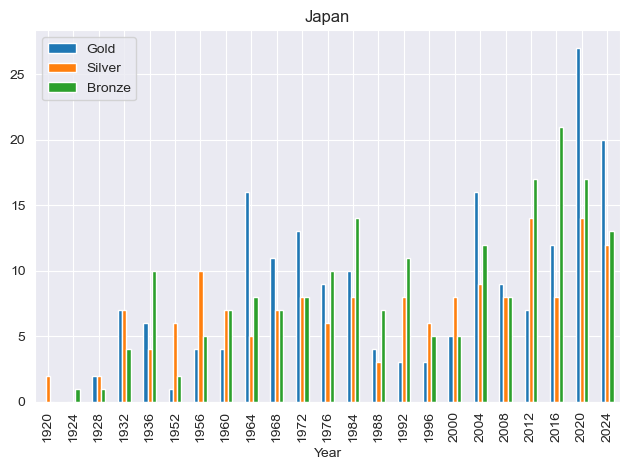

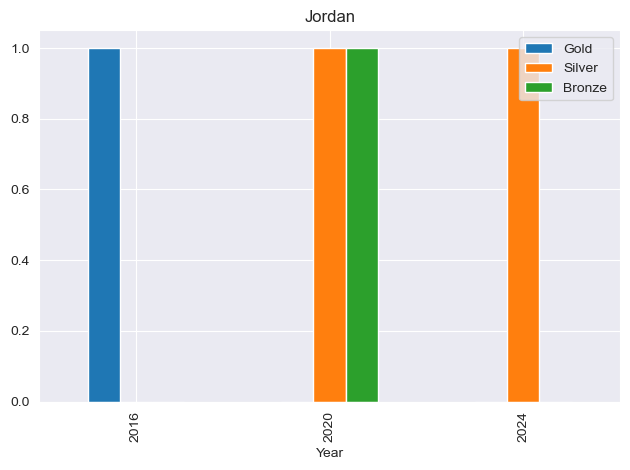

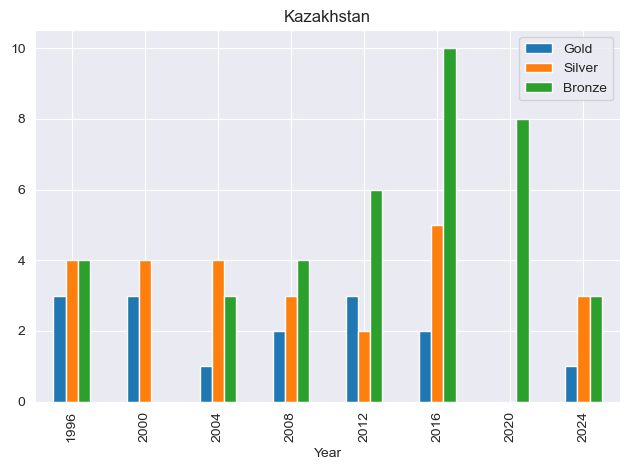

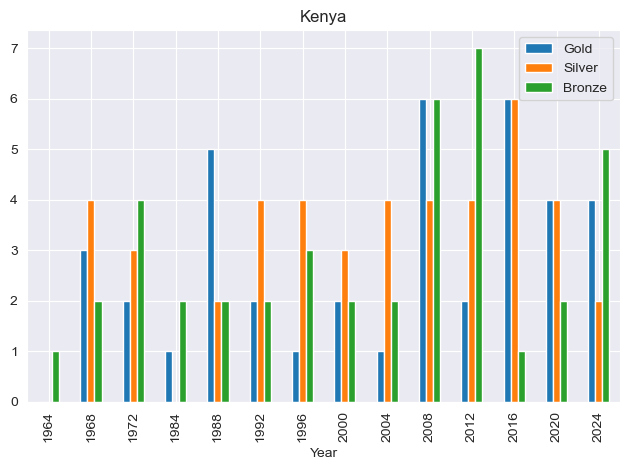

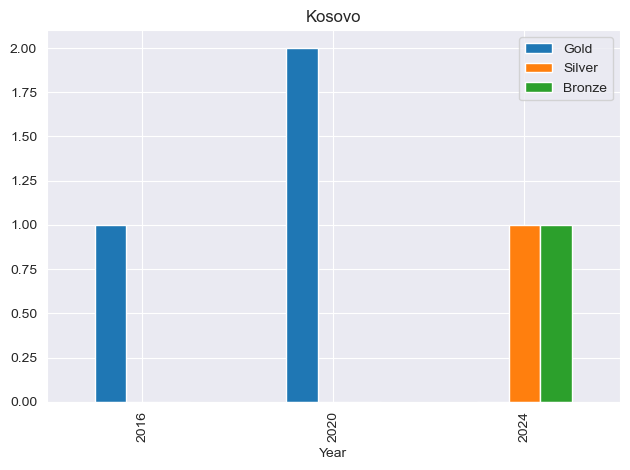

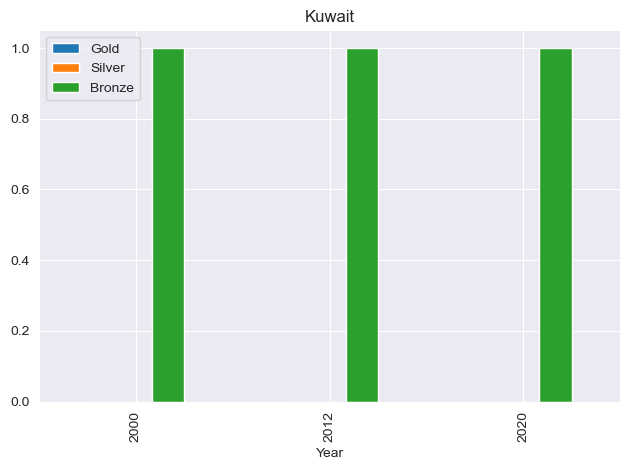

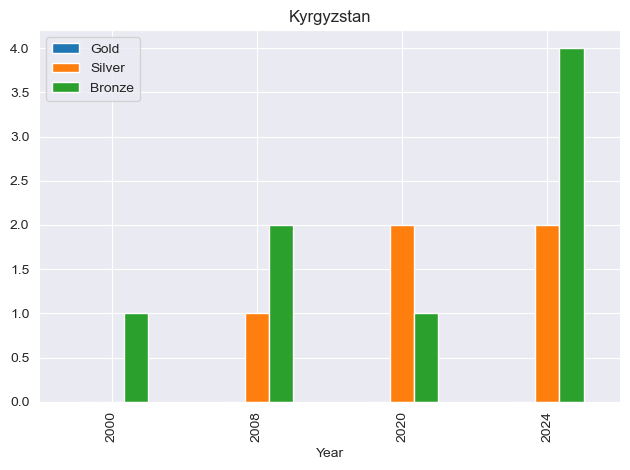

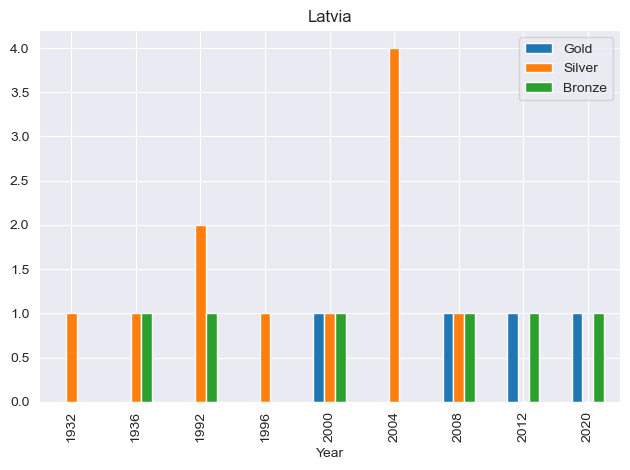

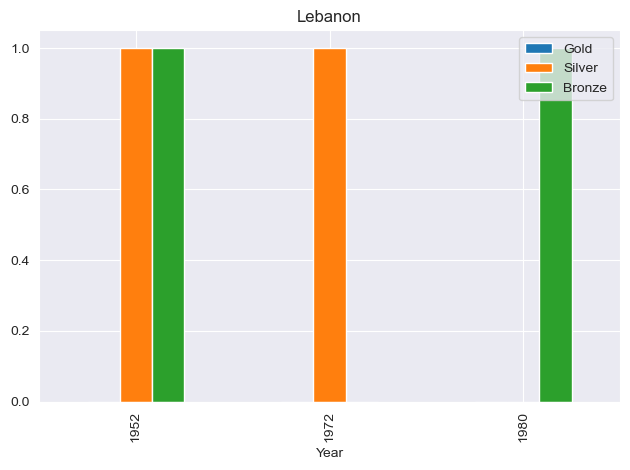

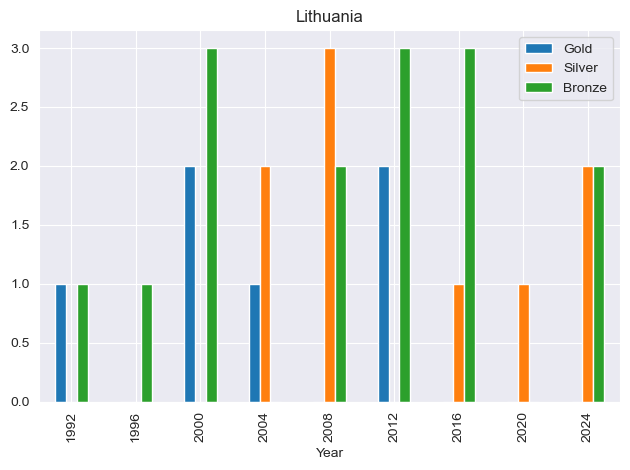

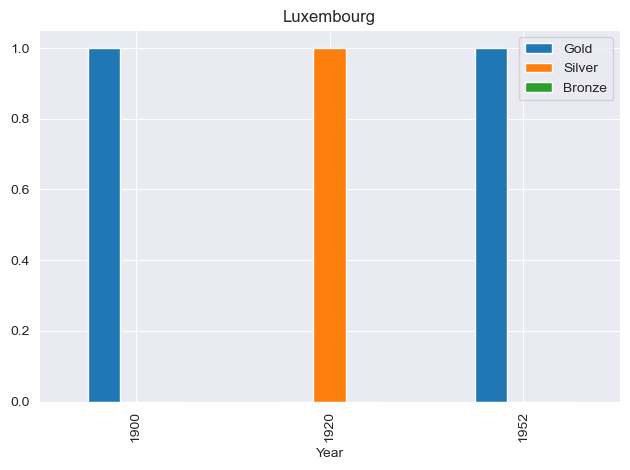

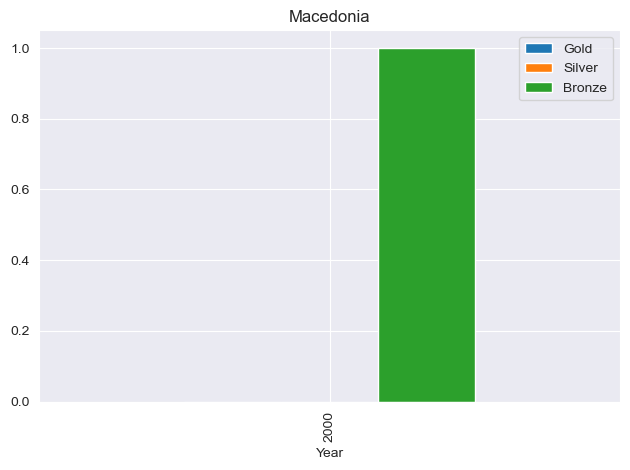

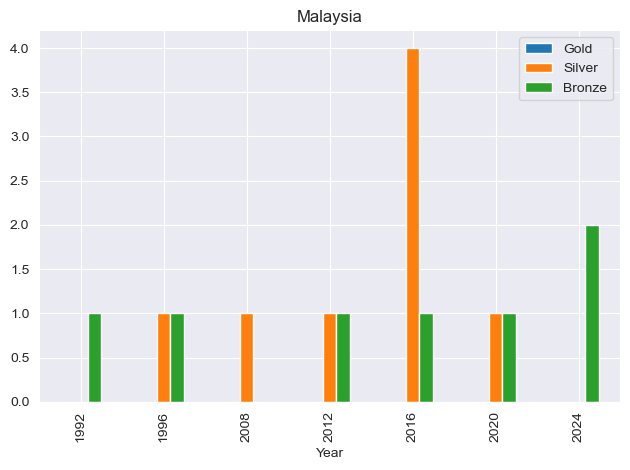

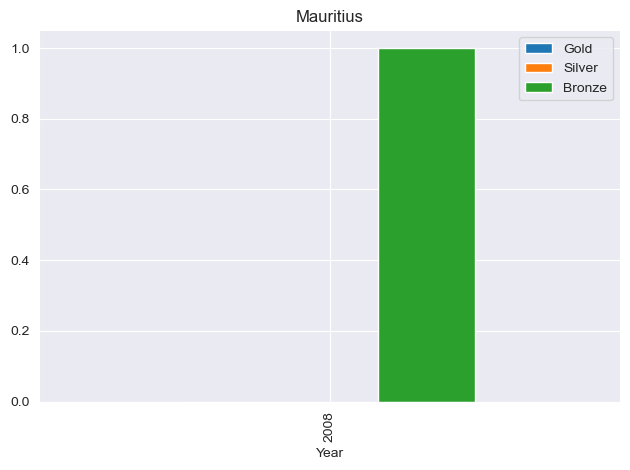

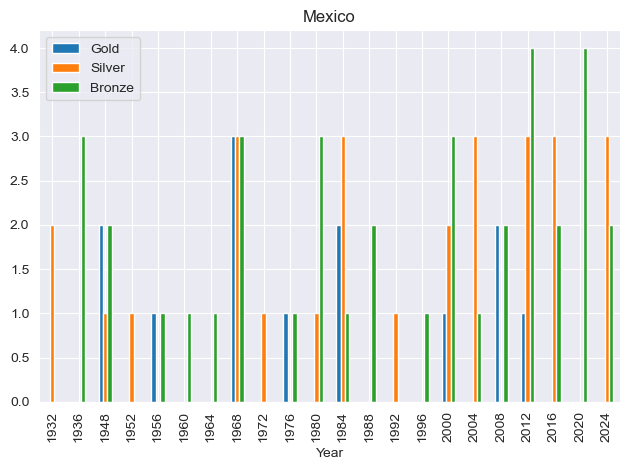

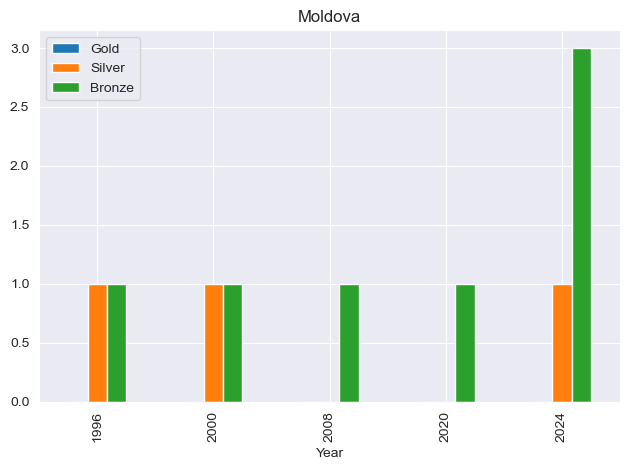

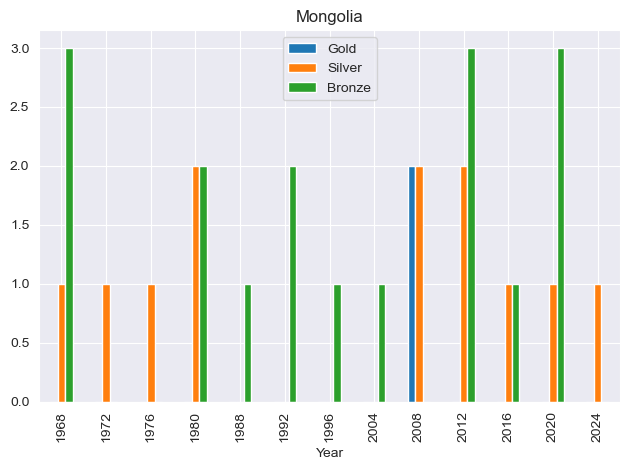

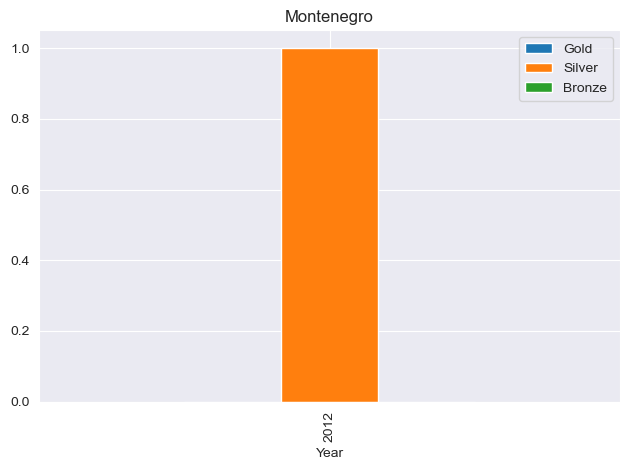

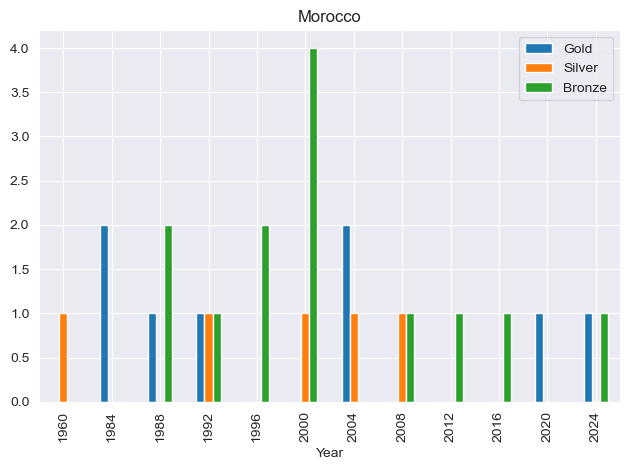

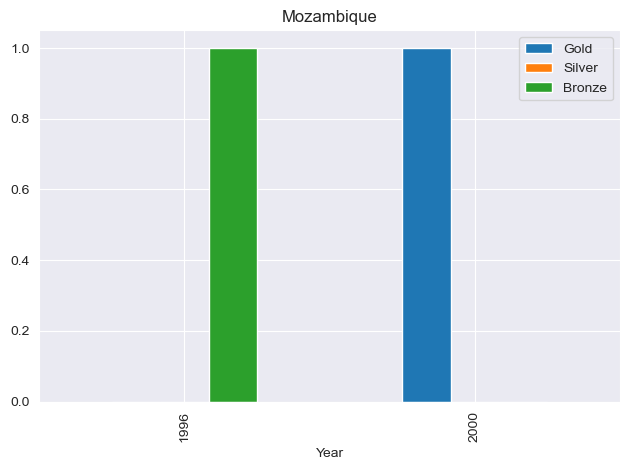

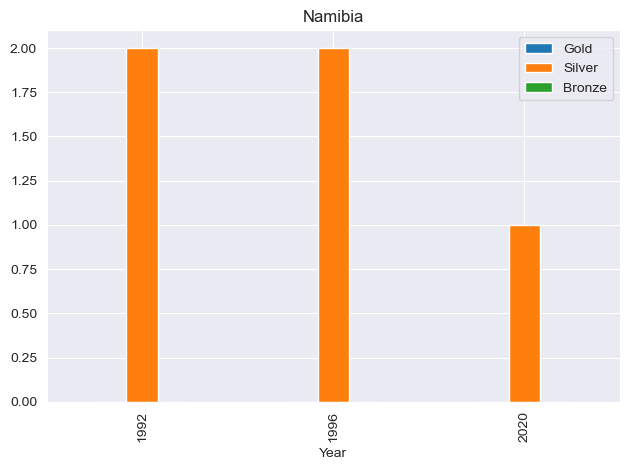

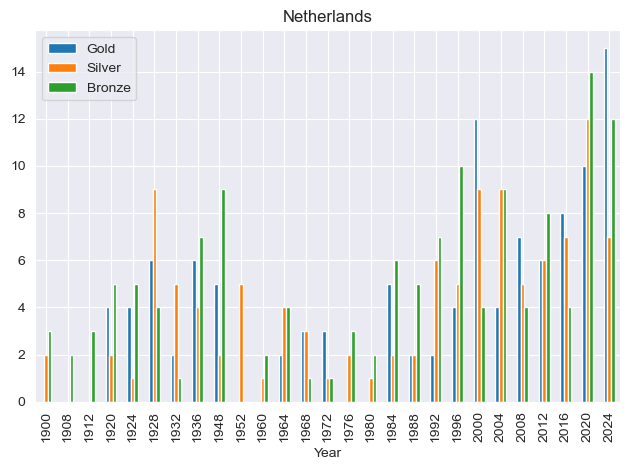

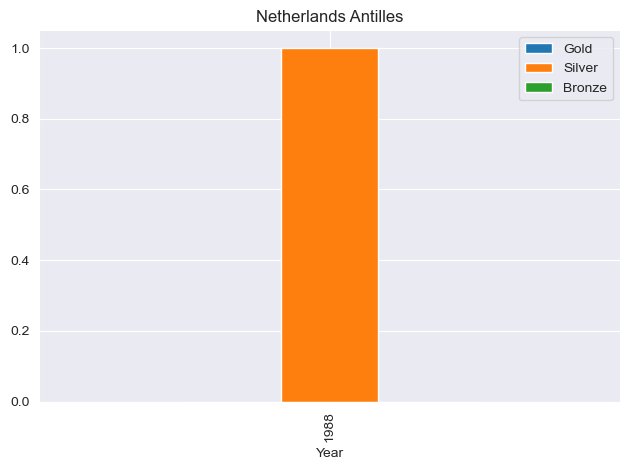

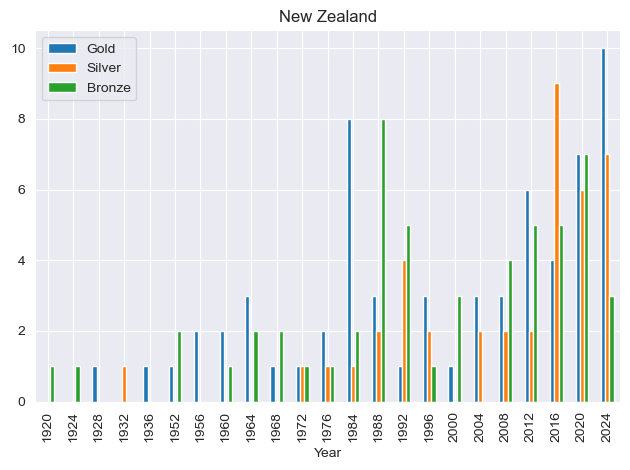

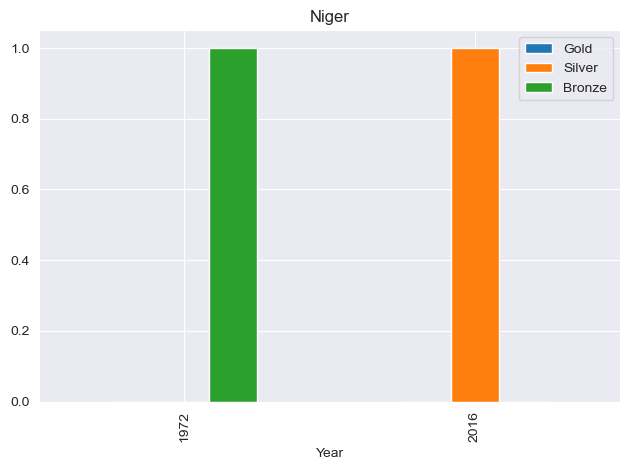

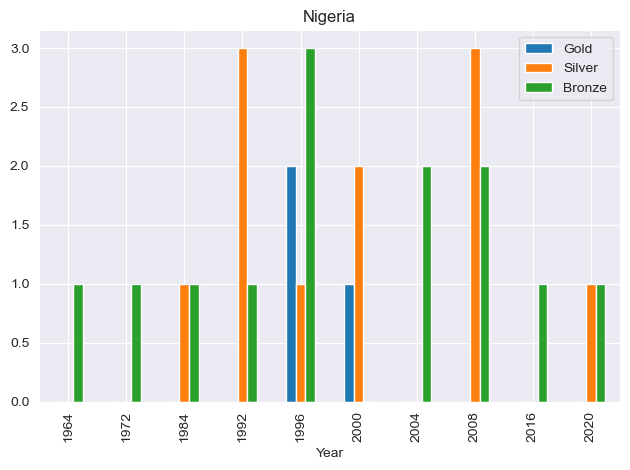

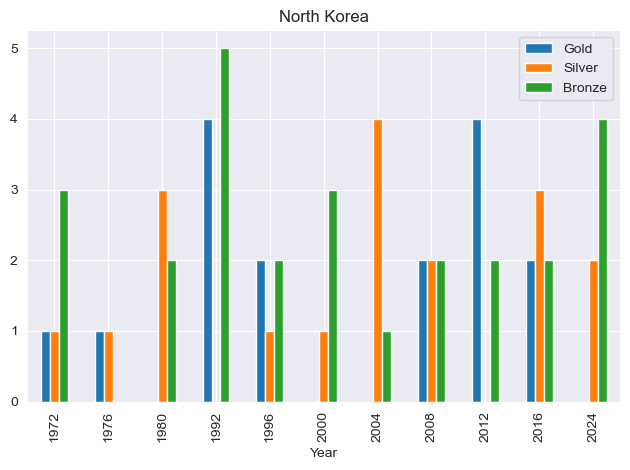

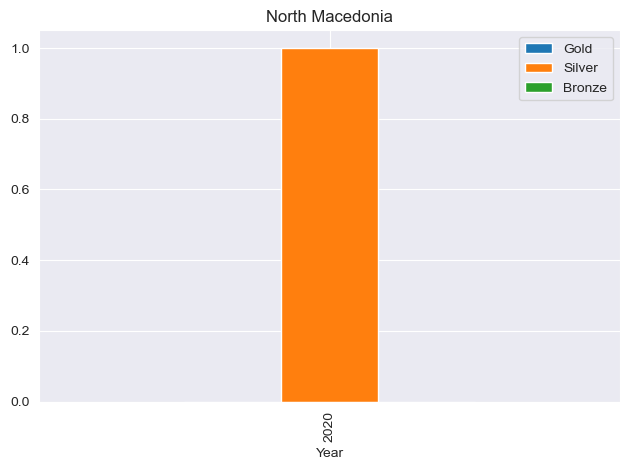

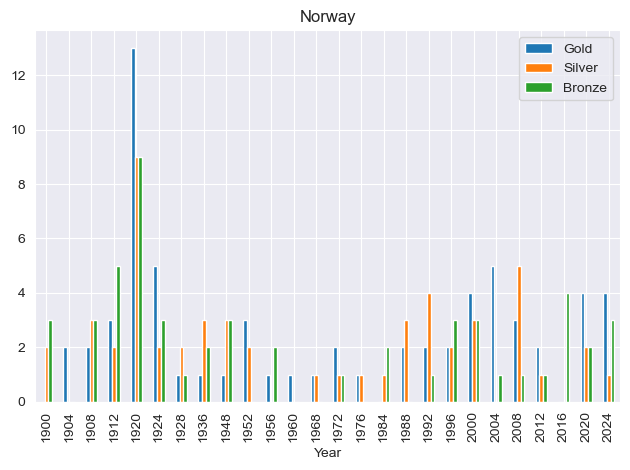

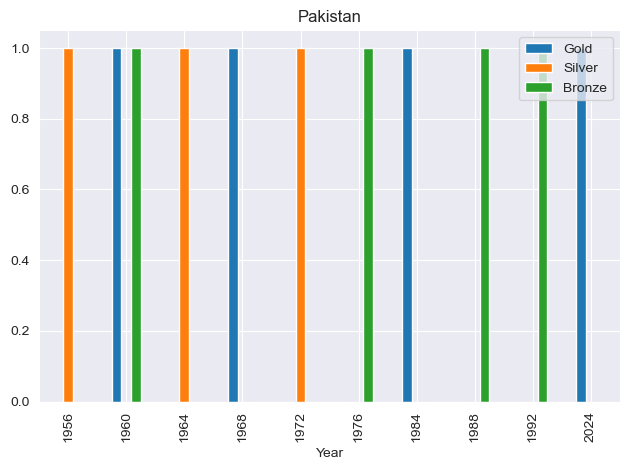

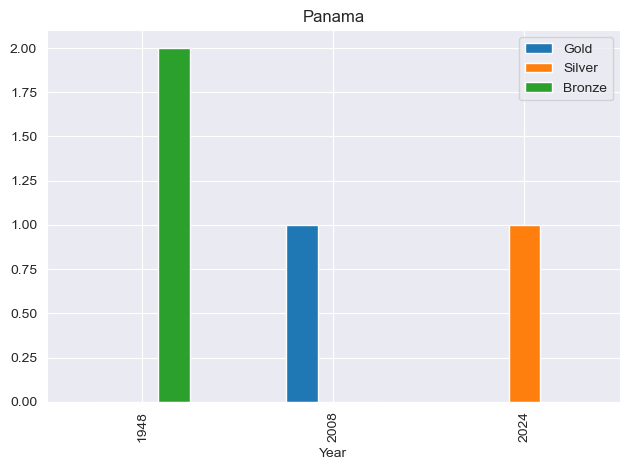

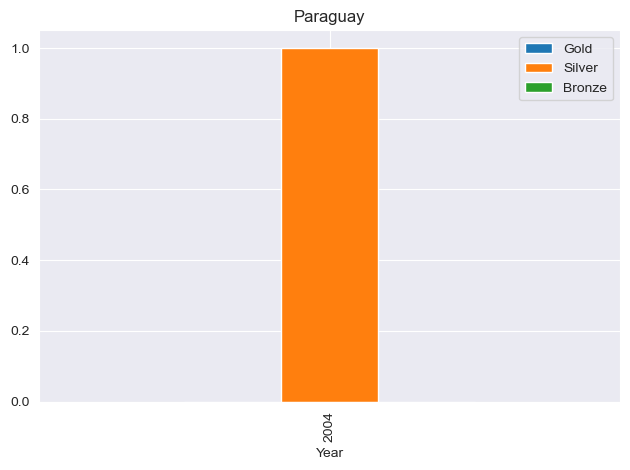

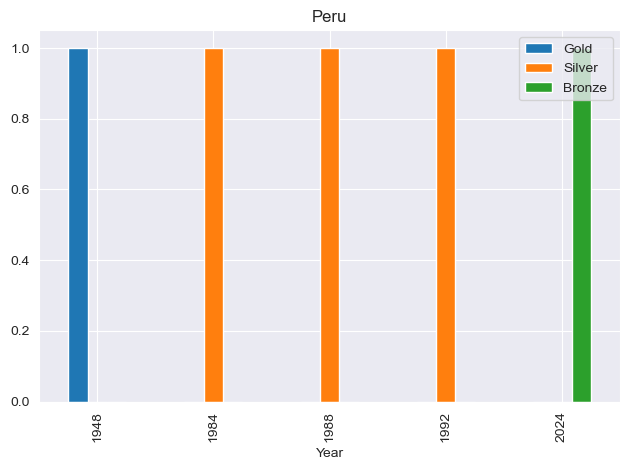

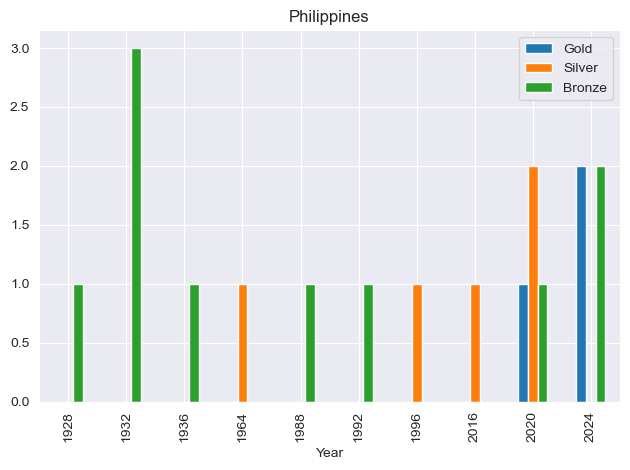

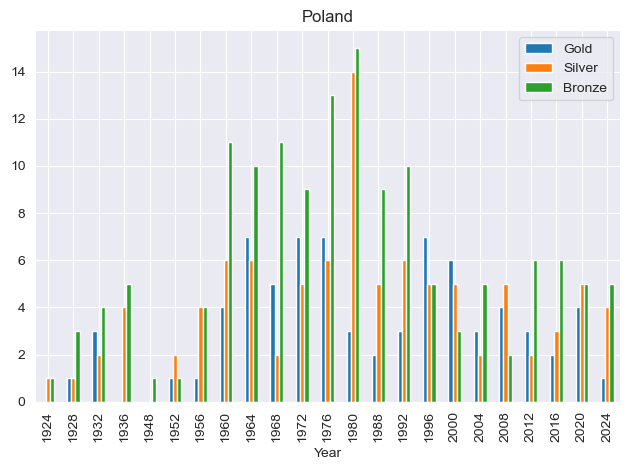

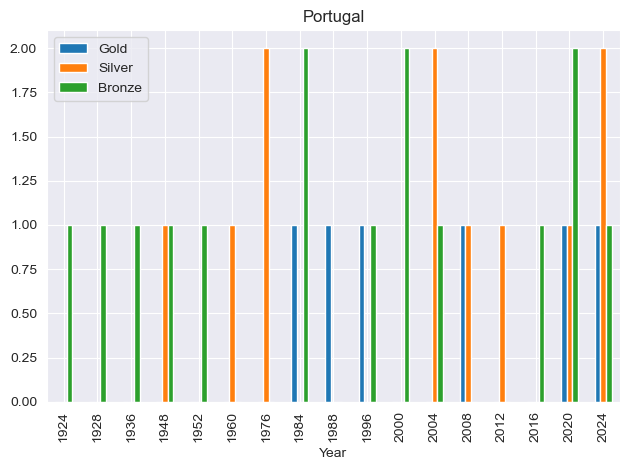

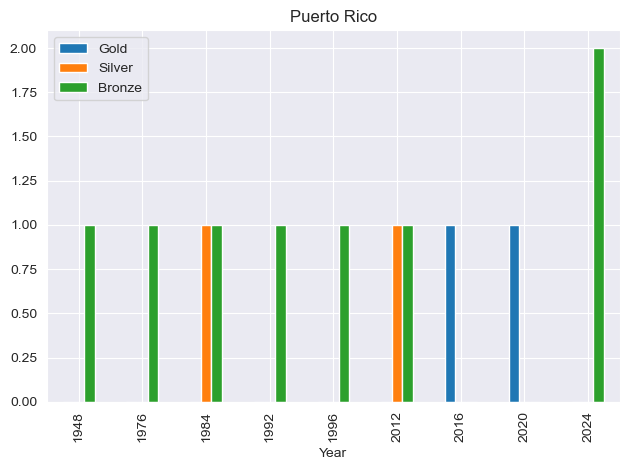

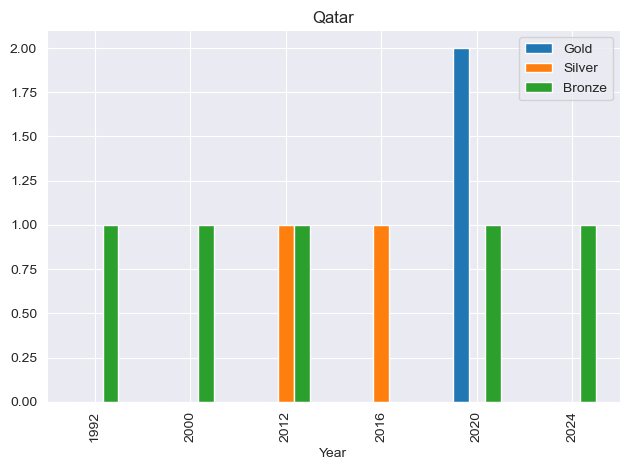

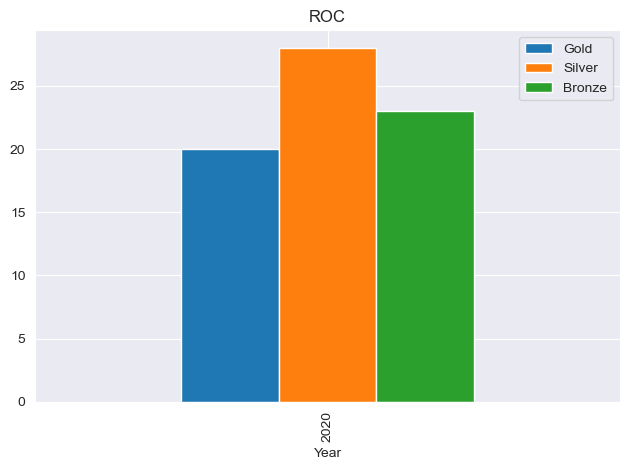

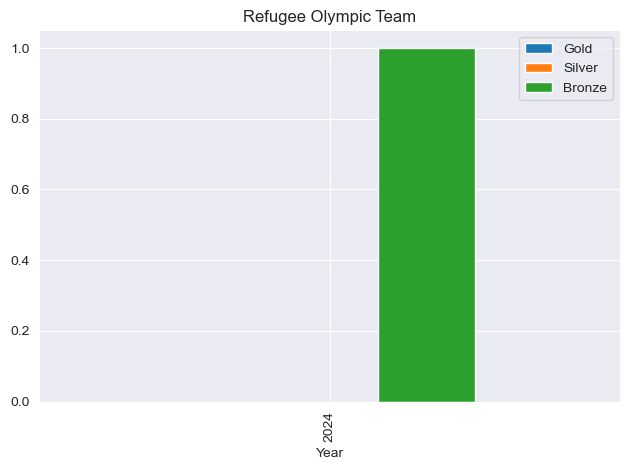

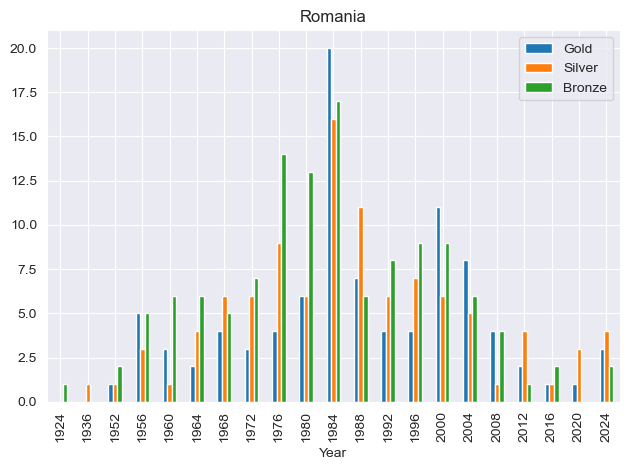

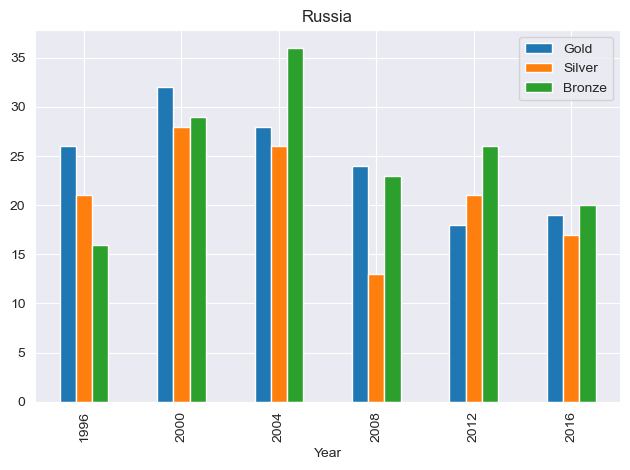

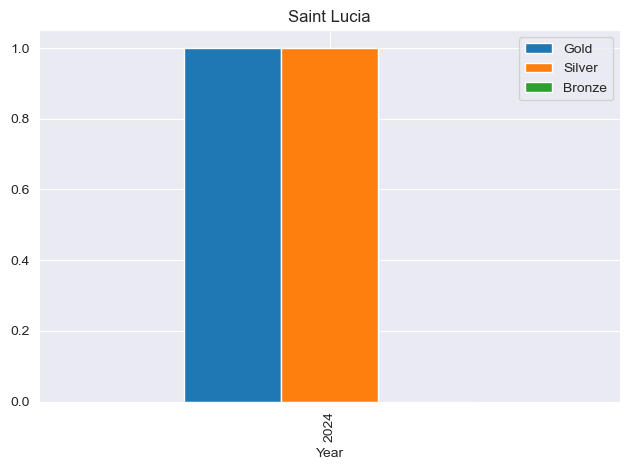

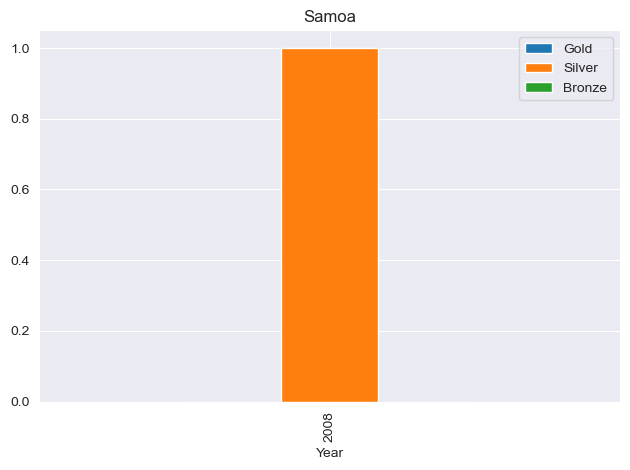

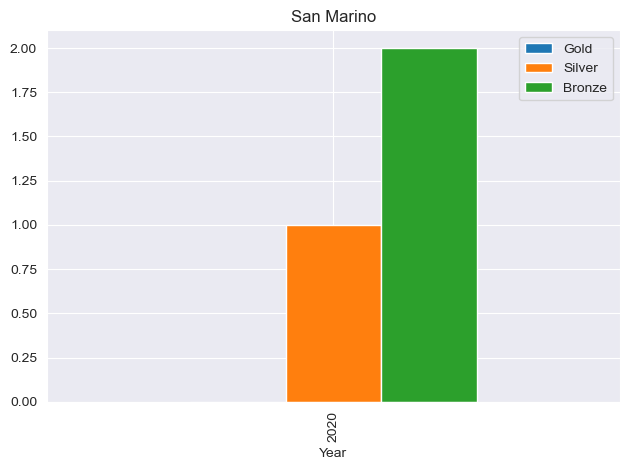

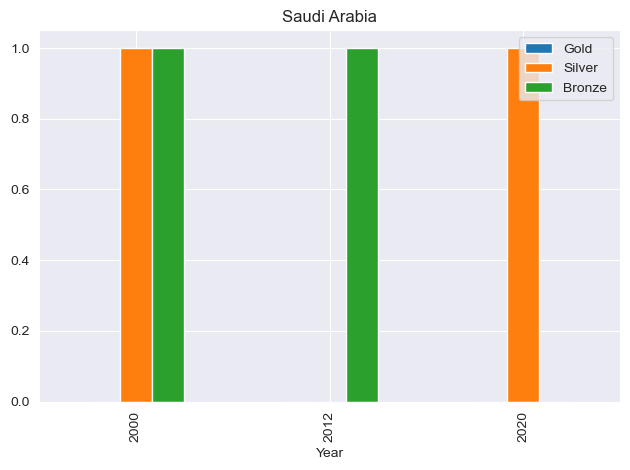

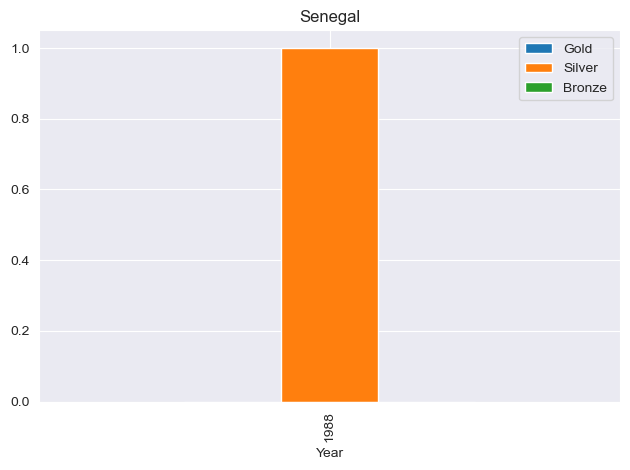

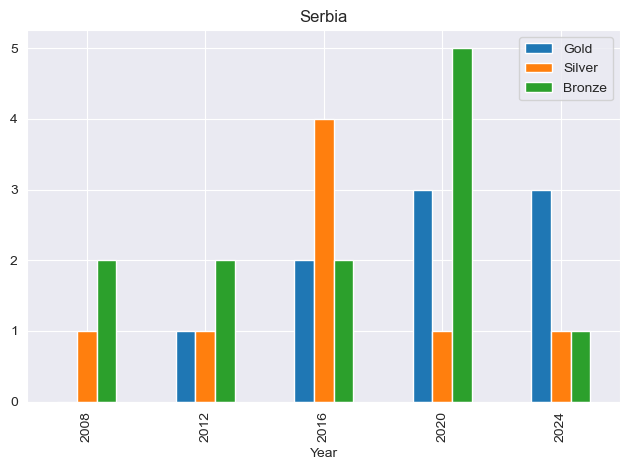

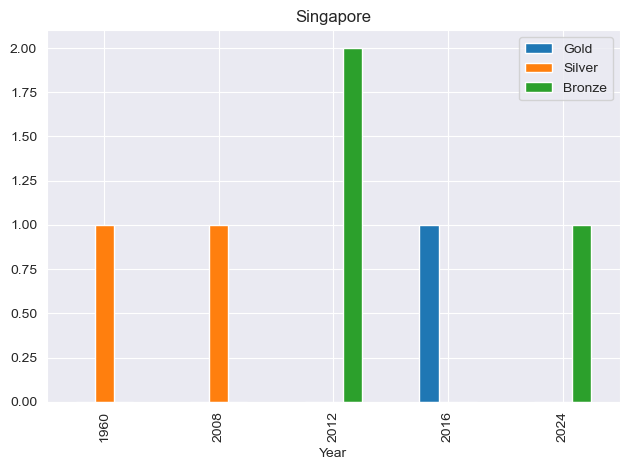

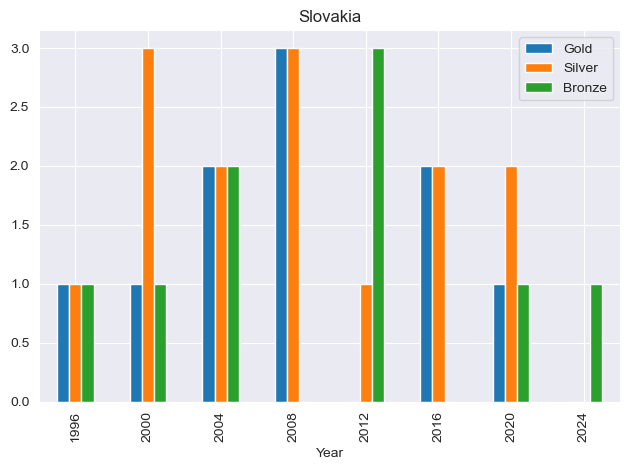

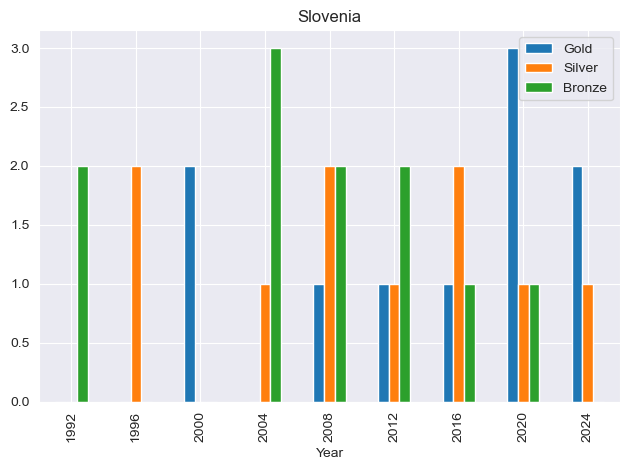

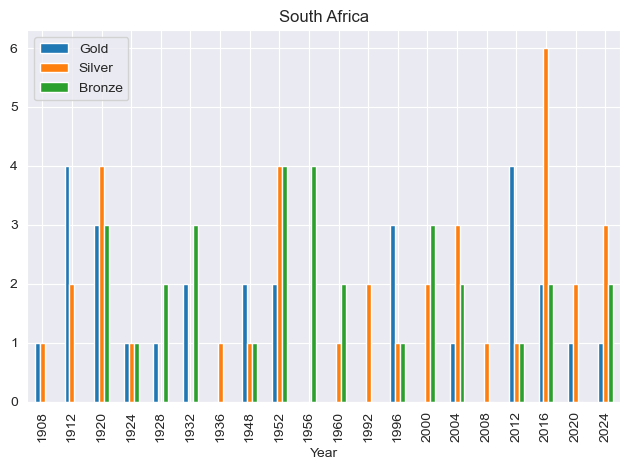

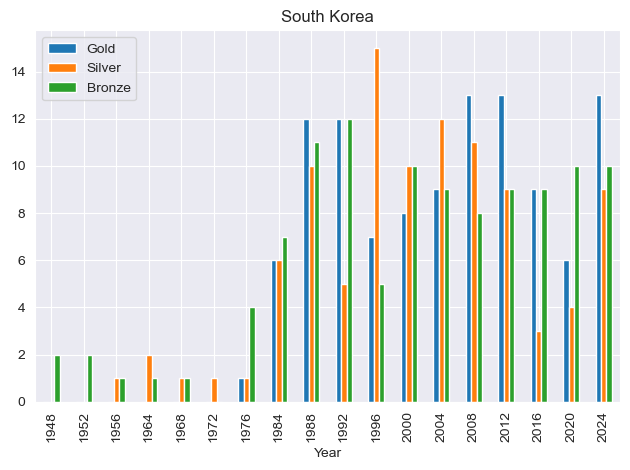

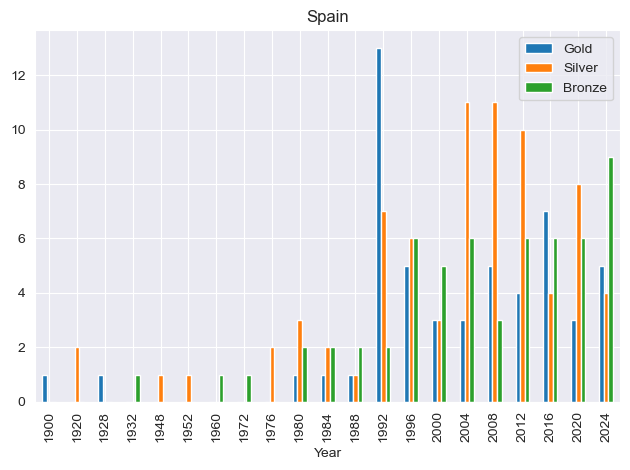

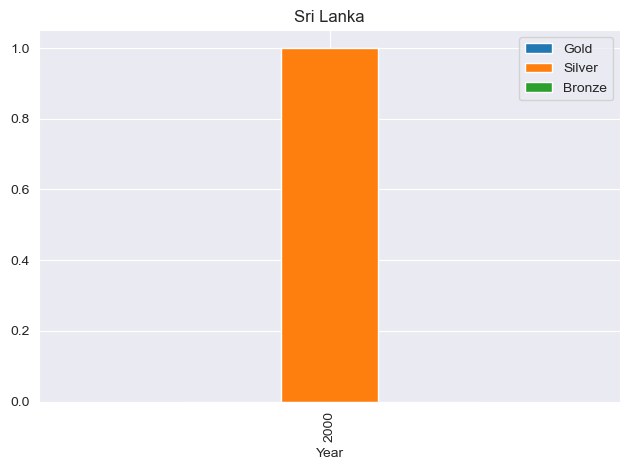

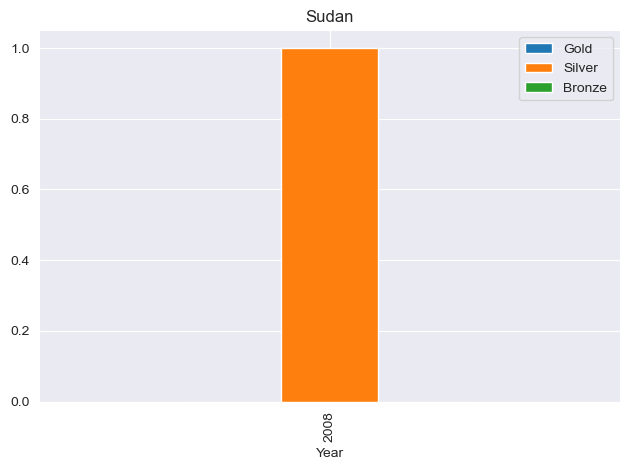

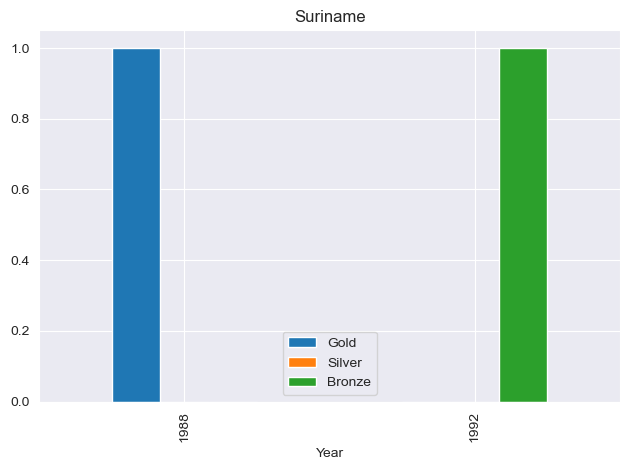

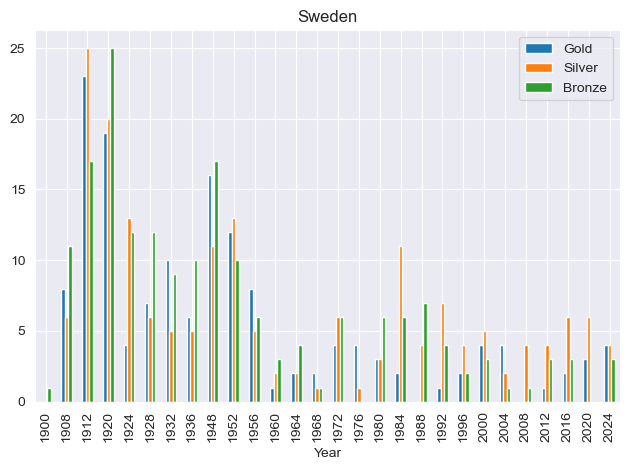

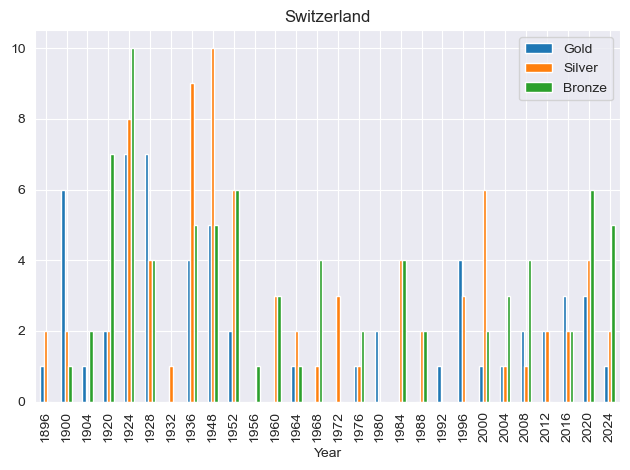

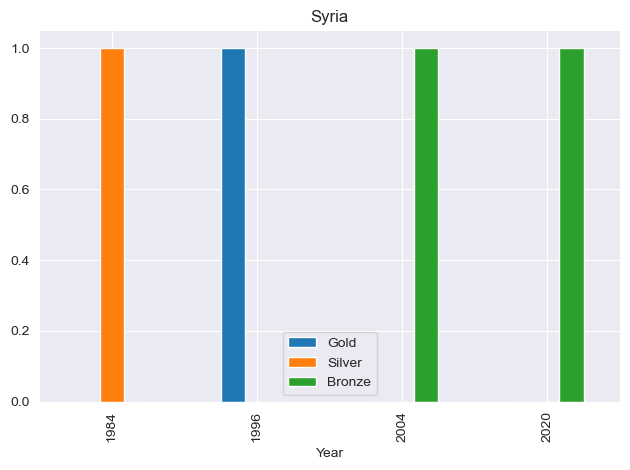

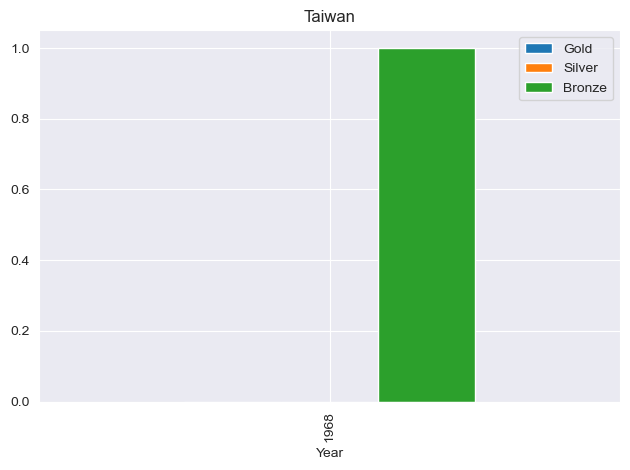

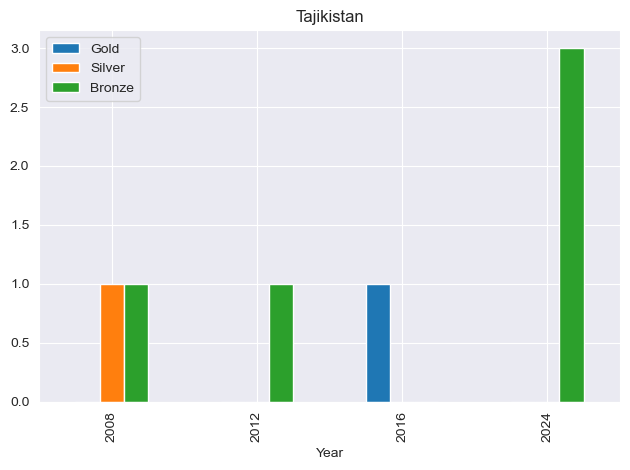

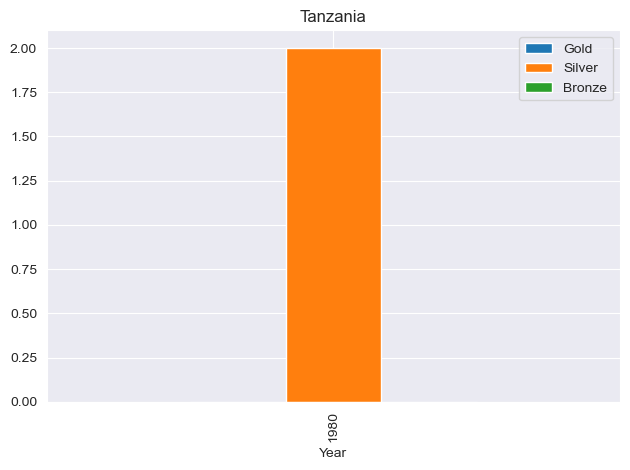

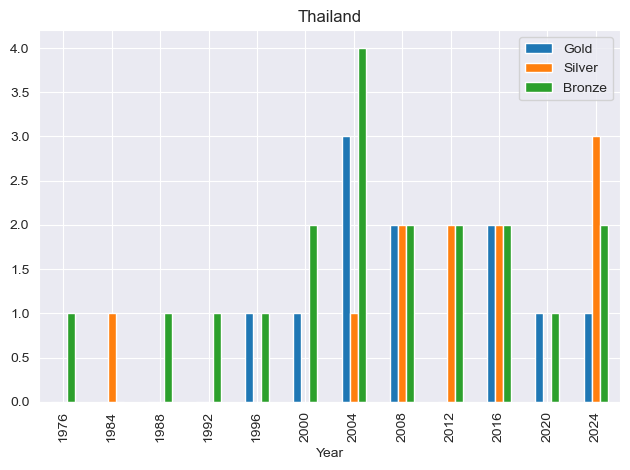

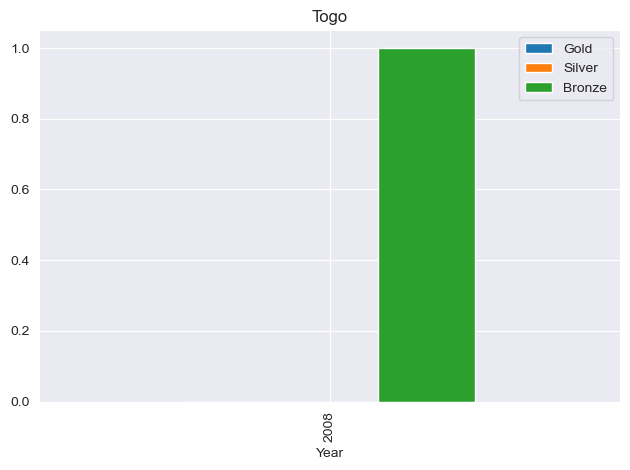

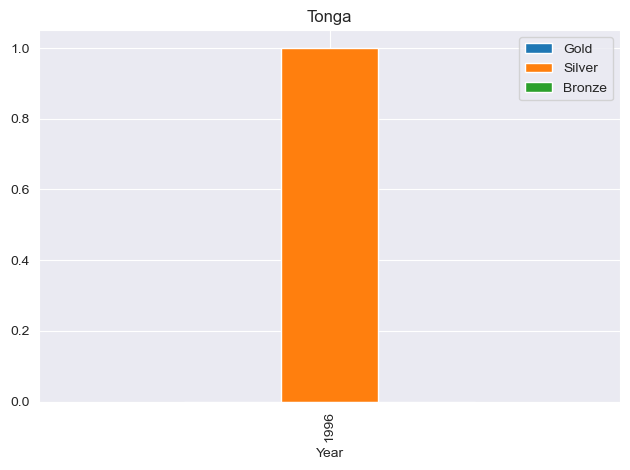

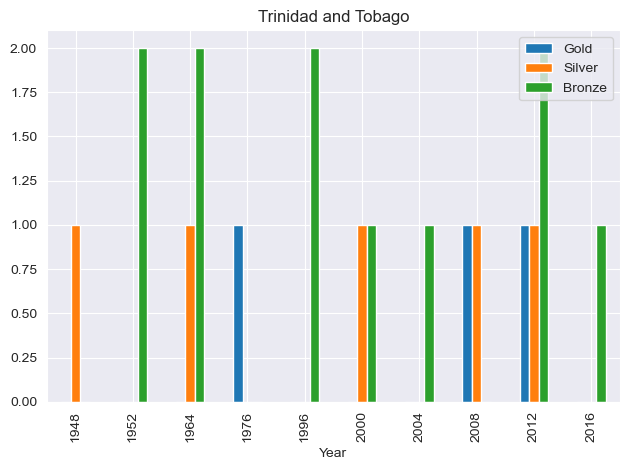

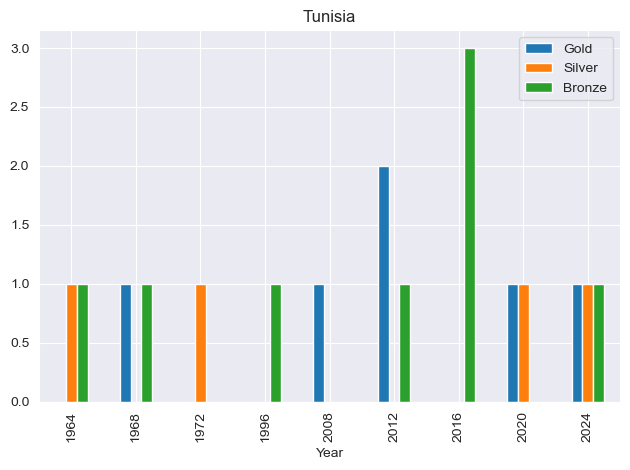

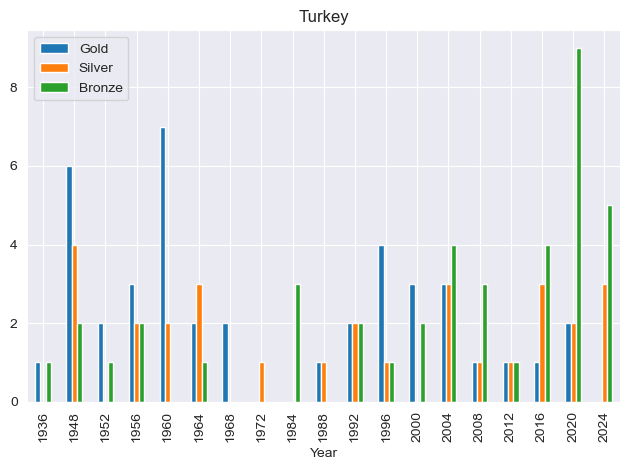

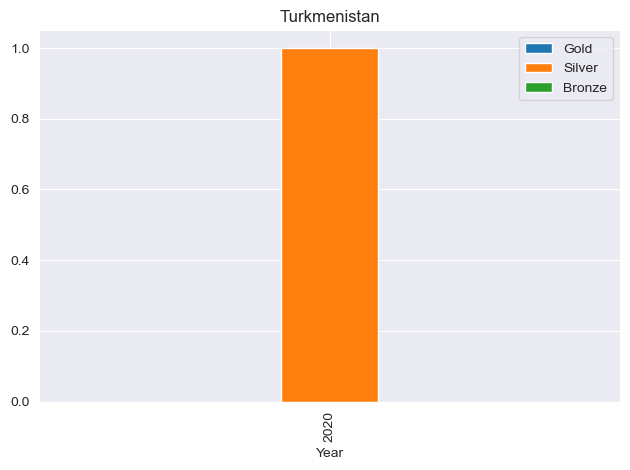

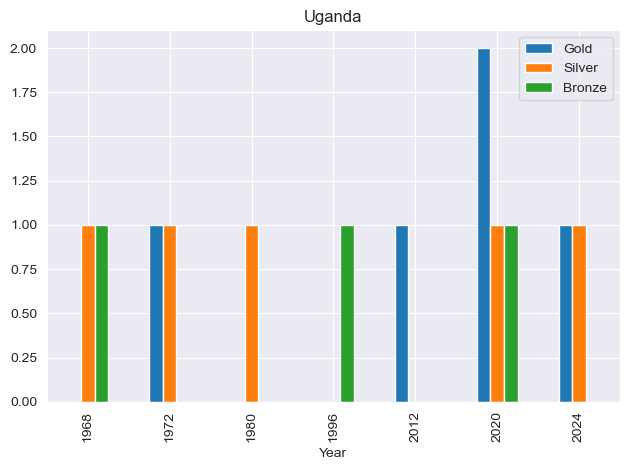

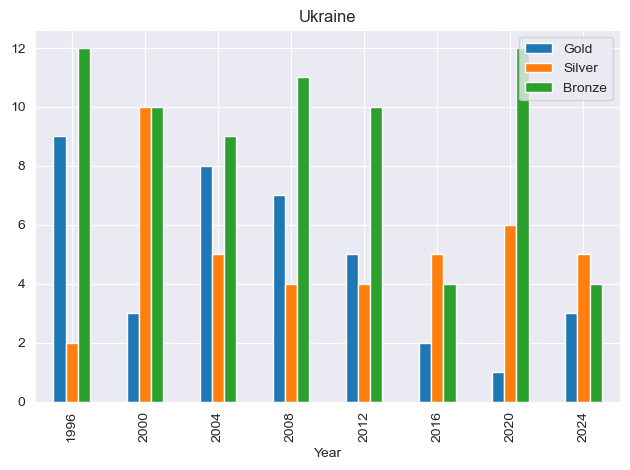

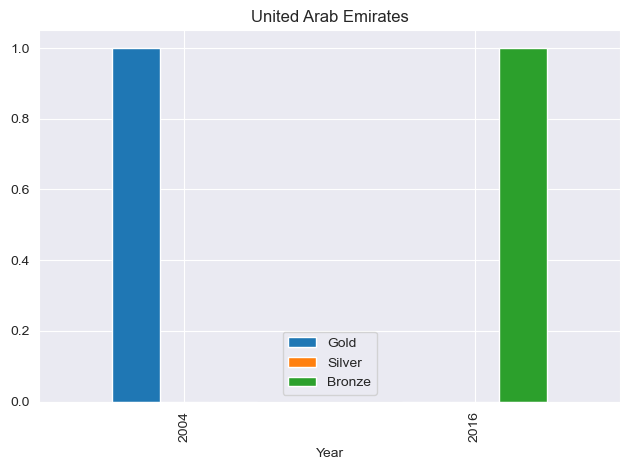

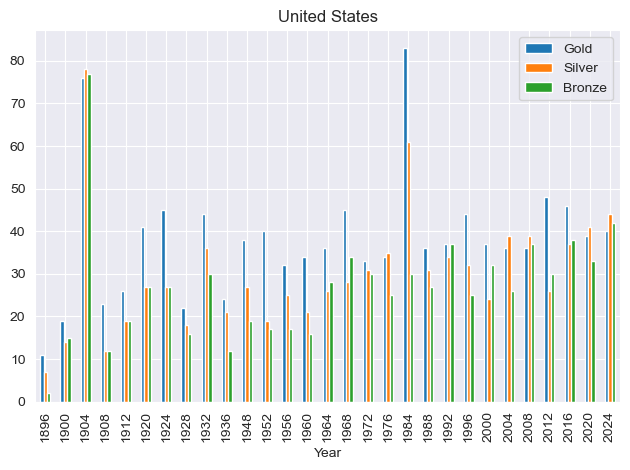

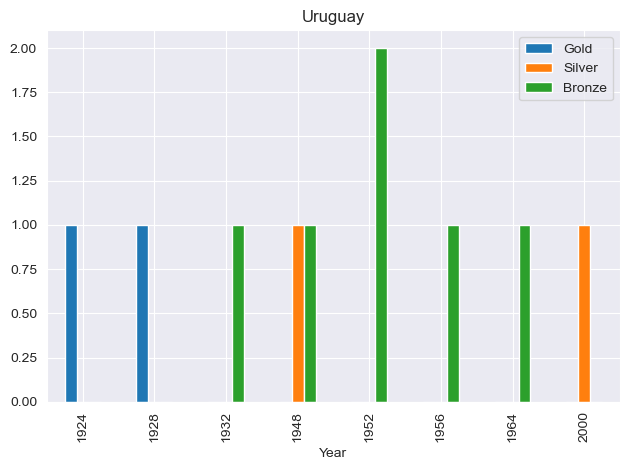

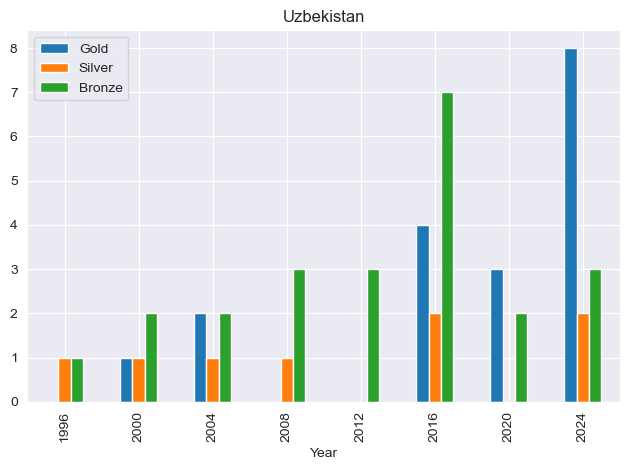

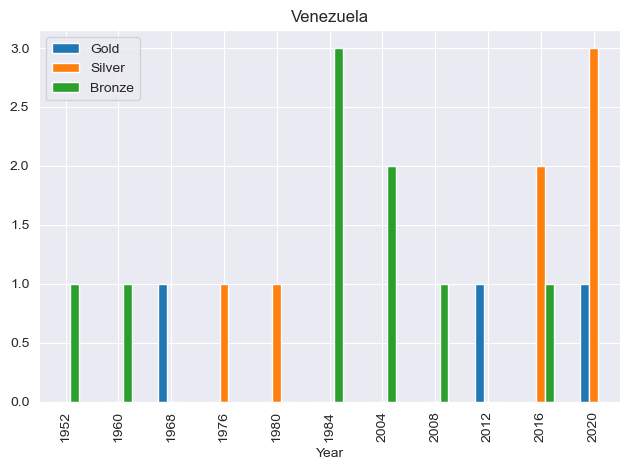

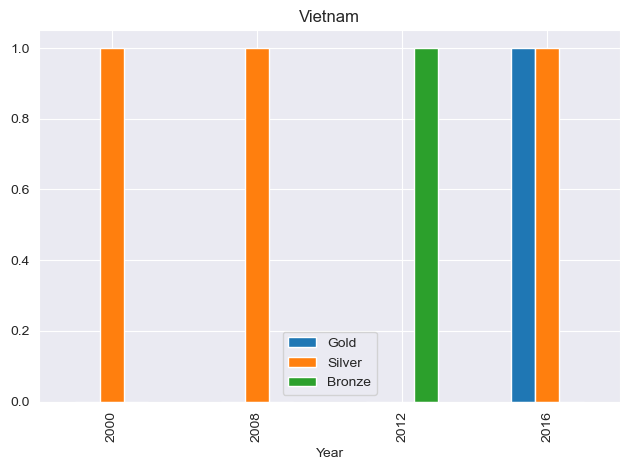

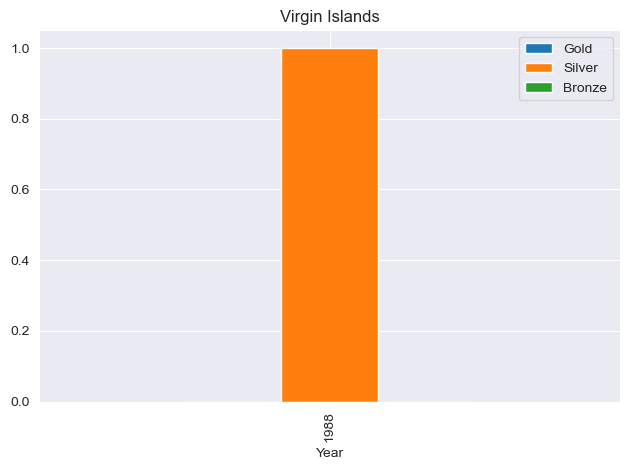

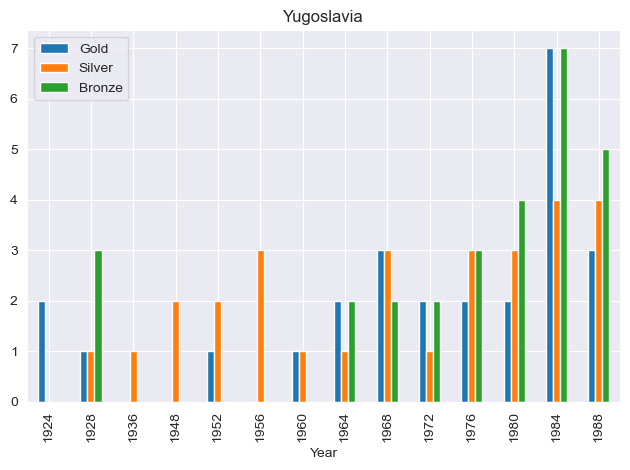

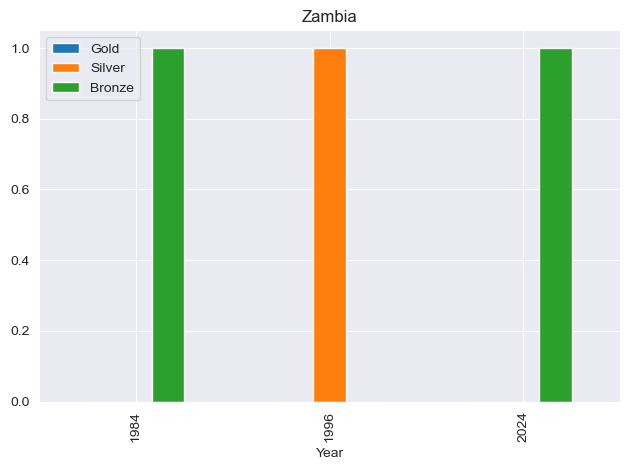

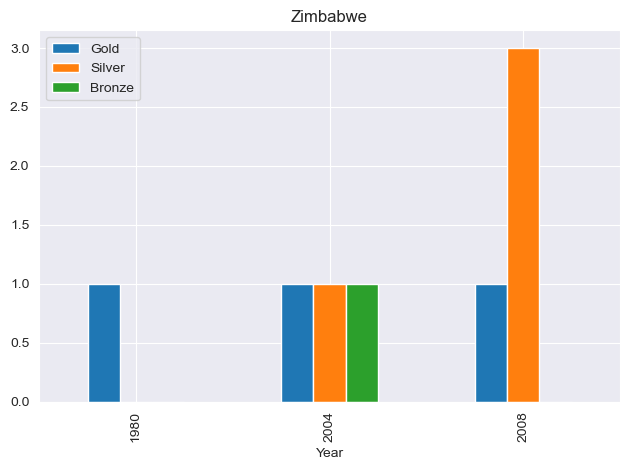

In [67]:
# 遍历分组
for name, group in final_cleaned_data.groupby("NOC"):
    # 绘制每个 NOC 的奖牌柱状图
    group.plot(x="Year", y=["Gold", "Silver", "Bronze"], kind="bar", title=name)
    plt.tight_layout()  # 调整布局
    plt.show()  # 显示每个图


- 清洗后得到的各个国家和地区的历史奖牌的柱状图如图

In [74]:
# 读取项目表
program_data = pd.read_csv("2025_Problem_C_Data\\summerOly_programs.csv", encoding="Windows-1252",sep=",")

In [78]:
program_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sport                  74 non-null     object 
 1   Discipline             72 non-null     object 
 2   Code                   74 non-null     object 
 3   Sports Governing Body  74 non-null     object 
 4   1896                   74 non-null     object 
 5   1900                   74 non-null     object 
 6   1904                   74 non-null     object 
 7   1906*                  74 non-null     int64  
 8   1908                   74 non-null     int64  
 9   1912                   74 non-null     object 
 10  1920                   74 non-null     int64  
 11  1924                   74 non-null     object 
 12  1928                   72 non-null     object 
 13  1932                   72 non-null     object 
 14  1936                   72 non-null     object 
 15  1948    

In [81]:
print(pd.unique(program_data["Discipline"]))

['Artistic Swimming' 'Diving' 'Marathon Swimming' 'Swimming' 'Water Polo'
 'Archery' 'Athletics' 'Badminton' 'Baseball' 'Softball' '3x3'
 'Basketball' 'Basque Pelota' 'Boxing' 'Breaking' 'Sprint' 'Slalom'
 'Cricket' 'Croquet' 'BMX Freestyle' 'BMX Racing' 'Mountain Bike' 'Road'
 'Track' 'Dressage' 'Eventing' 'Jumping' 'Vaulting' 'Driving' 'Fencing'
 'Field hockey' 'Flag football' 'Football' 'Golf' 'Artistic' 'Rhythmic'
 'Trampoline' 'Indoor' 'Field' 'Jeu de Paume' 'Judo' 'Karate' 'Sixes' nan
 'Polo' 'Rackets' 'Roque' 'Coastal' 'Rowing' 'Sevens' 'Union' 'Sailing'
 'Shooting' 'Skateboarding' 'Sport Climbing' 'Squash' 'Surfing'
 'Table Tennis' 'Taekwondo' 'Tennis' 'Triathlon' 'Tug of War' 'Beach'
 'Weightlifting' 'Freestyle' 'Greco-Roman' 'Figure' 'Ice Hockey'
 'Total events' 'Total disciplines' 'Total sports']


In [104]:
# 清楚不太可能存在于2028奥运会当中的项目
unlikely_events = [
    "Boxing", "Weightlifting", "Modern Pentathlon", "Breaking",
    "Croquet", "Softball", "Lacrosse", "Squash", "Cricket"
]

# Remove these unlikely events from the dataset
filtered_program_data = program_data[~program_data['Sport'].isin(unlikely_events)]
filtered_program_data = filtered_program_data.drop(index=[71,72])
filtered_program_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 0 to 73
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sport                  63 non-null     object 
 1   Discipline             62 non-null     object 
 2   Code                   63 non-null     object 
 3   Sports Governing Body  63 non-null     object 
 4   1896                   63 non-null     object 
 5   1900                   63 non-null     object 
 6   1904                   63 non-null     object 
 7   1906*                  63 non-null     int64  
 8   1908                   63 non-null     int64  
 9   1912                   63 non-null     object 
 10  1920                   63 non-null     int64  
 11  1924                   63 non-null     object 
 12  1928                   61 non-null     object 
 13  1932                   61 non-null     object 
 14  1936                   61 non-null     object 
 15  1948         

1. **拳击（Boxing）**：由于国际拳击联合会的管理问题，拳击项目未被列入2028年洛杉矶奥运会的初始项目名单。尽管如此，如果相关问题得到解决，拳击仍有可能被重新纳入。 ([澎湃新闻](https://www.thepaper.cn/newsDetail_forward_15781574?utm_source=chatgpt.com))

2. **举重（Weightlifting）**：因反兴奋剂方面的历史问题，举重项目也未被列入初始名单。国际举重联合会需要进行改革，以确保该项目能够回归奥运会。 ([澎湃新闻](https://www.thepaper.cn/newsDetail_forward_15781574?utm_source=chatgpt.com))

3. **现代五项（Modern Pentathlon）**：由于项目结构的调整，特别是计划将马术项目替换为其他项目，现代五项目前未在初始名单中。成功的改革可能使其重新获得奥运资格。 ([澎湃新闻](https://www.thepaper.cn/newsDetail_forward_15781574?utm_source=chatgpt.com))

4. **霹雳舞（Breaking）**：尽管在2024年巴黎奥运会上首次亮相，但霹雳舞未被纳入2028年洛杉矶奥运会的项目。 ([Diario AS](https://as.com/juegos_olimpicos/proxima-parada-hollywood-7000-millones-sin-coches-criquet-n/?utm_source=chatgpt.com))

5. **槌球（Croquet）**、**壘球（Softball）**、**长曲棍球（Lacrosse）**、**壁球（Squash）**、**板球（Cricket）**：这些项目在历史上曾出现在奥运会上，但在近期的奥运会中并未包含。然而，洛杉矶奥组委提议将棒垒球、板球、腰旗橄榄球、棍网球和壁球作为新增大项纳入2028年奥运会。 


In [105]:
# 转换类型
# 遍历所有列，将日期列的数据类型转换为整数
for col in filtered_program_data.columns:
    if col not in ["Discipline", "Sport", "Sports Governing Body","Code"]:
        # 将列数据转换为整数，跳过可能导致错误的数据
        filtered_program_data[col] = pd.to_numeric(filtered_program_data[col], errors='coerce').fillna(0).astype(int)


In [106]:
filtered_program_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 0 to 73
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sport                  63 non-null     object
 1   Discipline             62 non-null     object
 2   Code                   63 non-null     object
 3   Sports Governing Body  63 non-null     object
 4   1896                   63 non-null     int32 
 5   1900                   63 non-null     int32 
 6   1904                   63 non-null     int32 
 7   1906*                  63 non-null     int32 
 8   1908                   63 non-null     int32 
 9   1912                   63 non-null     int32 
 10  1920                   63 non-null     int32 
 11  1924                   63 non-null     int32 
 12  1928                   63 non-null     int32 
 13  1932                   63 non-null     int32 
 14  1936                   63 non-null     int32 
 15  1948                   63 non-

In [107]:
filtered_program_data.head(10)

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1,2,2,2,2,2,2,2
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4,8,8,8,8,8,8,8
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,2
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32,32,32,32,32,32,35,35
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1,2,2,2,2,2,2,2
5,Archery,Archery,ARC,World Archery,0,7,6,0,3,0,...,4,4,4,4,4,4,4,4,5,5
6,Athletics,Athletics,ATH,World Athletics,12,23,25,21,26,30,...,42,43,44,46,46,47,47,47,48,48
7,Badminton,Badminton,BDM,BWF,0,0,0,0,0,0,...,0,4,5,5,5,5,5,5,5,5
8,Baseball and Softball,Baseball,BSB,WBSC[s1],0,0,0,0,0,0,...,0,1,1,1,1,1,0,0,1,0
9,Baseball and Softball,Softball,SBL,WBSC[s1],0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,1,0
